# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path= './data/NCDC/uk/marham/dat.txt' 
file_path= './data/NCDC/uk/tiree/dat.txt'  # try 4
# file_path= './data/NCDC/uk/boscombe_down/dat.txt' # 4?, numpy bug
# file_path= './data/NCDC/uk/middle_wallop/dat.txt' 
# file_path= './data/NCDC/uk/southhamption/dat.txt' # high 0, trend
# file_path= './data/NCDC/uk/bournemouth/dat.txt' # 4?
# file_path= "./data/NCDC/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# Malaysia
# file_path= './data/NCDC/penang/dat.txt'
# file_path= './data/NCDC/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/butterworth/dat.txt' # 2 mode 

# Iran
# file_path= './data/NCDC/zabol/dat.txt'
# file_path= './data/NCDC/chahbahar/dat.txt'

# France
# file_path= './data/NCDC/nantes/dat.txt' # some dir R square / K-S differs big, unit detect fails
# file_path= './data/NCDC/pau_pyrenees/dat.txt'

# file_path= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/singapore_seletar/dat.txt"
# file_path= "./data/NCDC/sultan_mahmud/dat.txt" # Stable
# file_path= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# file_path= "./data/NCDC/europe/neuburg/dat.txt"
# file_path= "./data/NCDC/europe/valladolid/dat.txt"
# file_path= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good, trend
# file_path= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/holzdorf/dat.txt" # 2008 year
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= "./data/NCDC/europe/barayas/dat.txt" # numpy problem
# file_path= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s), mixed report type
# file_path= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked

# file_path= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Good data, Weird KDE shape, might be blocked?
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path= "./data/NCDC/oceania/canberra/dat.txt" # high 0, numpy problem

# file_path= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# file_path= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# file_path= "./data/NCDC/cn/nanjing_lukou/dat.txt" 
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/hefei_luogang/dat.txt" # few 0, trend
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0

# file_path = 'TOP/hr_avg.csv' # High 0
# file_path = './data/asos/denver/hr_avg.csv'

# file_path = './data/asos/bismarck_ND/hr_avg.csv' # try 4?
# file_path = './data/asos/aberdeen_SD/hr_avg.csv' # only to 2012, good fit, try 2
# file_path = './data/asos/minneapolis/hr_avg.csv'

# file_path = './data/asos/lincoln_NE/hr_avg.csv' 
# file_path = './data/asos/des_moines_IA/hr_avg.csv'
# file_path = './data/asos/springfield_IL/hr_avg.csv' # good fit

# file_path = 'D:/NDAWN/baker/hr_avg.csv'
# file_path = 'D:/NDAWN/rugby/hr_avg.csv'
# file_path = 'D:/NDAWN/bowman/hr_avg.csv'
# file_path = 'D:/NDAWN/grand_forks/hr_avg.csv'
# file_path = 'D:/NDAWN/williston/hr_avg.csv'
# file_path = 'D:/NDAWN/jamestown/hr_avg.csv'

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = False
else:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0       19790101  0000  FM-12  230    3.6         N
1       19790101  0100  FM-12  250    5.1         N
2       19790101  0200  FM-12  250    7.7         N
3       19790101  0300  FM-12  270    9.3         N
4       19790101  0400  FM-12  300   11.3         N
5       19790101  0500  FM-12  330   10.3         N
6       19790101  0600  FM-12  330    9.3         N
7       19790101  0700  FM-12  360    6.7         N
8       19790101  0800  FM-12  310    6.7         N
9       19790101  0900  FM-12  290    4.1         N
10      19790101  1000  FM-12  280    8.2         N
11      19790101  1100  FM-12  290    6.2         N
12      19790101  1200  FM-12   20    3.1         N
13      19790101  1300  FM-12  280    8.2         N
14      19790101  1400  FM-12  280    7.7         N
15      19790101  1500  FM-12  280   10.3         N
16      19790101  1600  FM-12  290    3.6         N
17      19790101  1700  FM-12  300    9.3         N
18      19790101  1800  FM-12  290    4.6         N
19      19790101  1900  FM-12  340    5.7         N
20      19790101  2000  FM-12   60    3.6         N
21      19790101  2100  FM-12  110    3.6         N
22      19790101  2200  FM-12   90    3.6         N
23      19790101  2300  FM-12  320    3.6         N
24      19790102  0000  FM-12  280   14.4         N
25      19790102  0100  FM-12  270   13.4         N
26      19790102  0200  FM-12  280   13.4         N
27      19790102  0300  FM-12  280   11.8         N
28      19790102  0400  FM-12  290    8.2         N
29      19790102  0500  FM-12  290    6.2         N
...          ...   ...    ...  ...    ...       ...
486093  20160801  1350  FM-15  170    3.1         V
486094  20160801  1400  FM-12  170    3.1         N
486095  20160801  1420  FM-15  150    2.1         V
486096  20160801  1450  FM-15   30    2.6         V
486097  20160801  1500  FM-12   30    2.6         N
486098  20160801  1520  FM-15  999    1.5         V
486099  20160801  1550  FM-15  130    2.1         N
486100  20160801  1600  FM-12  130    2.1         N
486101  20160801  1620  FM-15  100    2.1         V
486102  20160801  1650  FM-15  110    3.1         V
486103  20160801  1700  FM-12  110    3.1         N
486104  20160801  1720  FM-15   70    3.1         V
486105  20160801  1750  FM-15   50    4.6         V
486106  20160801  1800  FM-12   50    4.6         N
486107  20160801  1850  FM-15   60    5.1         N
486108  20160801  1900  FM-12   60    5.1         N
486109  20160801  1920  FM-15   60    5.1         N
486110  20160801  1950  FM-15   60    4.1         N
486111  20160801  2000  FM-12   60    4.1         N
486112  20160801  2020  FM-15   50    4.1         N
486113  20160801  2050  FM-15   50    3.6         N
486114  20160801  2100  FM-12   50    3.6         N
486115  20160801  2120  FM-15   50    3.6         N
486116  20160801  2150  FM-15   60    3.6         N
486117  20160801  2200  FM-12   60    3.6         N
486118  20160801  2220  FM-15   60    3.6         N
486119  20160801  2250  FM-15   60    3.1         N
486120  20160801  2300  FM-12   60    3.1         N
486121  20160801  2320  FM-15   70    4.1         N
486122  20160801  2350  FM-15   70    4.1         N

[486123 rows x 6 columns]

In [5]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20170000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


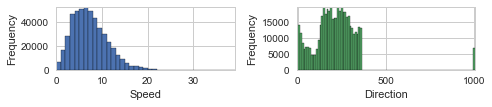

In [6]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [7]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

date           HrMn            dir          speed  \
count  4.853830e+05  485383.000000  485383.000000  485383.000000   
mean   2.000788e+07    1153.725957     205.073847       7.268022   
std    1.142918e+05     670.111036     129.567515       3.840033   
min    1.979010e+07       0.000000       0.000000       0.000000   
25%    1.991013e+07     600.000000     130.000000       4.600000   
50%    2.003032e+07    1120.000000     200.000000       6.700000   
75%    2.011102e+07    1700.000000     270.000000       9.800000   
max    2.016080e+07    2350.000000     999.000000      38.600000   

               month   dir_windrose  
count  485383.000000  485383.000000  
mean        6.484026     204.830806  
std         3.442359     134.306571  
min         1.000000       0.000000  
25%         4.000000     140.000000  
50%         6.000000     200.000000  
75%         9.000000     270.000000  
max        12.000000     999.000000

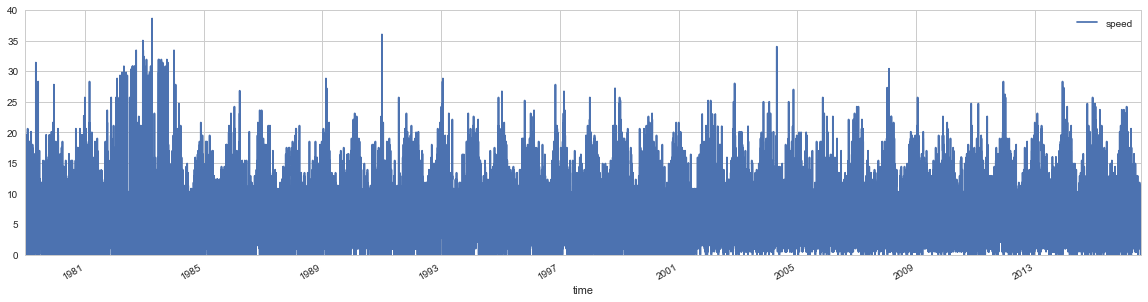

In [8]:
df.plot(y='speed',legend=True,figsize=(20,5))

### 1.2.1 Unit Detection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

True


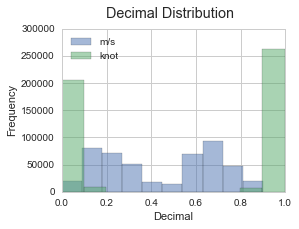

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
if 'knot_unit' not in globals():
    knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False

    if knot_unit:
        df['speed'] = df['speed'] * 1.943845
        df['decimal'] = df.speed % 1
        df.decimal.hist(alpha=0.5, label='knot')
        # need more elaboration, some is not near an integer
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
        speed_unit_text = ' (knot)'
    else:
        speed_unit_text = ' (m/s)'
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if 'knot_unit' == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.2.2 Sampling Type Selection

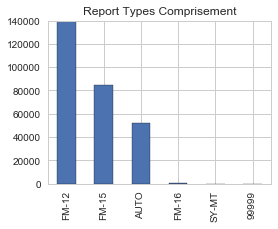

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

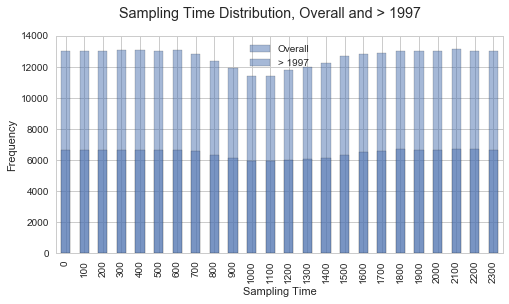

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df.query('date > @MID_YEAR * 10000')['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0]


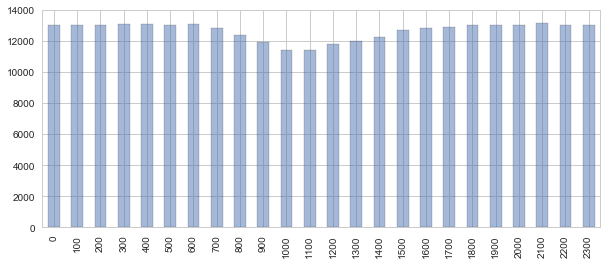

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
df = df.query("sample_time in @sample_times")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1991-01-03 06:00:00  19910103   600  FM-12  200     70         N      1   
2004-04-21 11:00:00  20040421  1100  FM-12  290     66         N      4   
1983-10-18 14:00:00  19831018  1400  FM-12  210     61         N     10   
1979-05-09 01:00:00  19790509   100  FM-12  140     61         N      5   
1989-02-13 15:00:00  19890213  1500  FM-12  160     56         N      2   
1993-01-21 21:00:00  19930121  2100  FM-12  180     56         N      1   
1993-01-17 05:00:00  19930117   500  FM-12  180     55         N      1   
2011-12-08 14:00:00  20111208  1400  FM-12  180     55         N     12   
1981-02-27 04:00:00  19810227   400  FM-12  320     55         N      2   
1979-06-06 04:00:00  19790606   400  FM-12  250     55         N      6   

                     dir_windrose  incre  incre_reverse  
time                                                     
1991-01-03 06:00:00           250   44.0           46.0  
2004-04-21 11:00:00           160   33.0           32.0  
1983-10-18 14:00:00           240   31.0           24.0  
1979-05-09 01:00:00           310   45.0           48.0  
1989-02-13 15:00:00           290    6.0            6.0  
1993-01-21 21:00:00           270    8.0            6.0  
1993-01-17 05:00:00           270   12.0            3.0  
2011-12-08 14:00:00           270    3.0            6.0  
1981-02-27 04:00:00           130   19.0           22.0  
1979-06-06 04:00:00           200   49.0           48.0

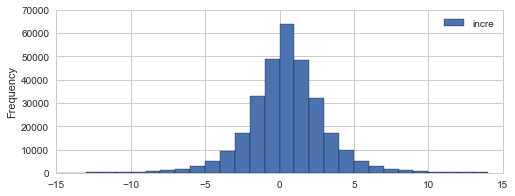

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 22


date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1993-01-21 21:00:00  19930121  2100  FM-12  180     56         N      1   
1989-02-13 15:00:00  19890213  1500  FM-12  160     56         N      2   
1993-01-17 05:00:00  19930117   500  FM-12  180     55         N      1   
1981-02-27 04:00:00  19810227   400  FM-12  320     55         N      2   
2011-12-08 14:00:00  20111208  1400  FM-12  180     55         N     12   
1979-12-17 01:00:00  19791217   100  FM-12  210     54         N     12   
1984-01-21 19:00:00  19840121  1900  FM-12  310     54         N      1   
2011-12-08 12:00:00  20111208  1200  FM-12  190     54         N     12   
2008-01-09 05:00:00  20080109   500  FM-12  170     53         N      1   
1996-11-06 05:00:00  19961106   500  FM-12  210     53         N     11   

                     dir_windrose  incre  incre_reverse  
time                                                     
1993-01-21 21:00:00           270    8.0            6.0  
1989-02-13 15:00:00           290    6.0            6.0  
1993-01-17 05:00:00           270   12.0            3.0  
1981-02-27 04:00:00           130   19.0           22.0  
2011-12-08 14:00:00           270    3.0            6.0  
1979-12-17 01:00:00           240    1.0            2.0  
1984-01-21 19:00:00           140    4.0            2.0  
2011-12-08 12:00:00           260    2.0            2.0  
2008-01-09 05:00:00           280   13.0           15.0  
1996-11-06 05:00:00           240   34.0            5.0

### 1.3.2 0 Speed

In [17]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.00653928680903


### 1.3.3 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [18]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       2920
10      2831
20      4235
30      4516
40      4623
50      4010
60      5202
70      6821
80      8805
90      8527
100     8698
110     7263
120     7665
130     7077
140     8106
150     8517
160    10467
170    10216
180    11171
190    11178
200    12361
210    11430
220    12151
230    10247
240    10279
250     9925
260    12179
270    11267
280    12124
290    11058
300    12298
310    10270
320     8852
330     5863
340     4178
350     2837
999     4034
Name: dir, dtype: int64

36 10.0


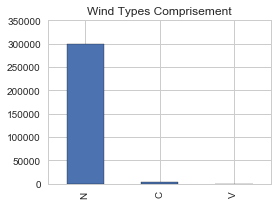

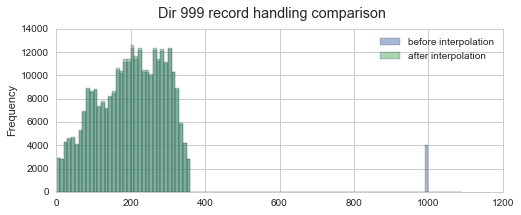

In [19]:
df=realign_direction(df, effective_column)
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.4 Time Shift Comparison

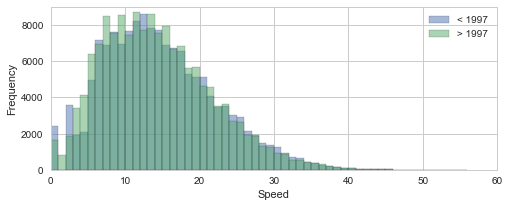

In [20]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

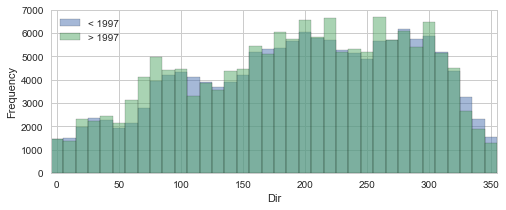

In [21]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

1979 - 1979


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


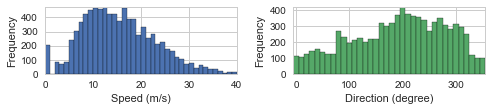

1980 - 1984


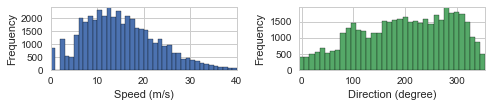

1985 - 1989


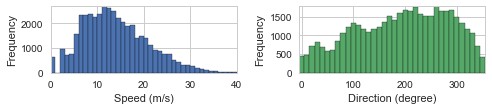

1990 - 1994


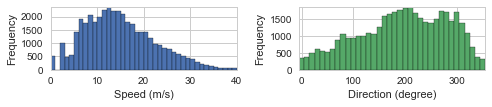

1995 - 1999


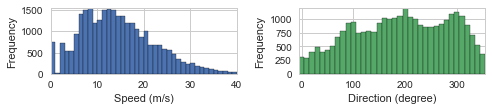

2000 - 2004


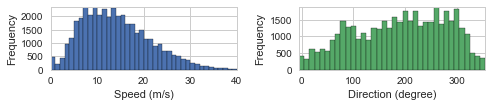

2005 - 2009


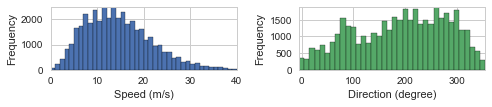

2010 - 2014


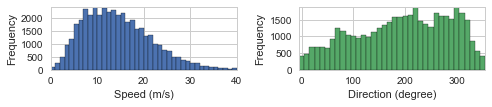

2015 - 2016


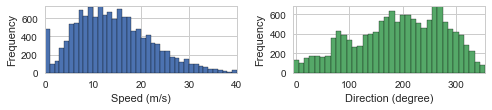

In [22]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 25.0)

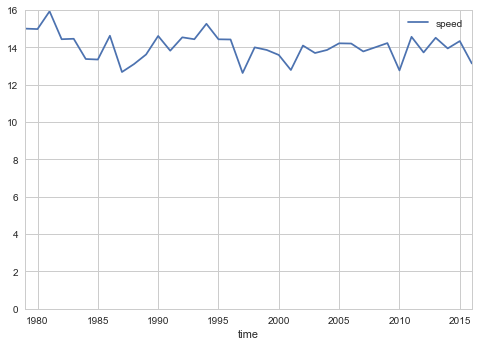

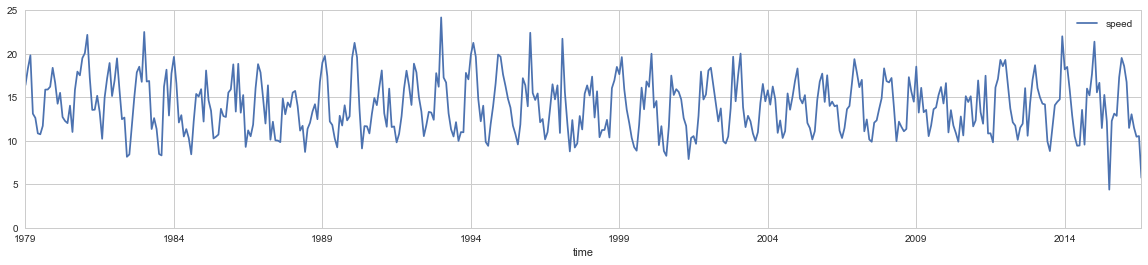

In [23]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [24]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

In [25]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 5000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANYAAAB6CAYAAADDPa27AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFCBJREFUeJztnXtwVPXZxz97yd6z2dwIigkaFFGp5SaBGcEWxsqUF9sB
pgSd+EftO1MHa61KcSyNiJkS6G1aRym2MsMEcaySdqBV36mFFlCMBklrgBaLlZB7stfsJdnLOe8f
cU82CtkkZLO7J7/PX2fPZfN7dvI9l+c8z/enkWVZRiAQTCjadA9AIFAjQlgCQQoQwhIIUoAQlkCQ
AoSwBIIUIIQlEKQAIawMRZZlvvOd77B//35lncfj4YknnqCiooI777yTX//610iSpGz3+/089dRT
LFmyhCVLlrBlyxbcbreyPRKJsH37dioqKqioqGDXrl3EYrFJjWuqIISVgcRiMbZt28bx48eHrf/e
977Hv/71L3bv3s3zzz/PX/7yF372s58p25955hk+/vhj9u7dy0svvcTHH3/M1q1ble2/+MUvOHHi
BHv27OGXv/wlhw4dYs+ePZMW15RCFmQULS0tcmVlpfzVr35VXrRokVxXVyfLsiw3NzfLs2fPls+c
OaPse/r0afm2226TA4GALMuyvGDBAvnw4cPK9kOHDsnz5s2TZVmW+/v75S9/+cvy22+/rWyvr6+X
ly5dKsdisckIbUohrlgZxunTpykvL6e+vp7c3FxlfUtLCyaTiVtvvVVZN2fOHCKRCM3NzQDk5+dz
+PBh+vr68Pv9/OlPf2Lu3LkAnDt3jlAoxOLFi5XjFy1ahNPppKWlZZKimzro0z0AwXDuvfde7r33
3i+sLy4upr+/H5fLRUFBAQBtbW0AuFwuAJ599lk2b97MHXfcAUBpaSkHDhwAoKurC7PZPEysxcXF
AHR2dnL99denLKapiLhiZQm33347M2fO5Omnn8br9eJ2u6mtrUWv1xOJRAD45JNPuOGGG9i3bx/7
9u0jNzeXzZs3I8syoVAIo9E47DsNBgMA4XB40uNRO+KKlSUYDAaee+45HnvsMSoqKjCbzTz88MOc
OXMGm81GS0sLNTU1vPXWW8ycOROA5557jpUrV/L+++9jMpm+IKD4Z7PZPOnxqB0hrCzi5ptv5s9/
/jNOpxObzUYsFmPXrl2UlpbS3NyMyWRSRAUwY8YM8vPzuXTpEjfeeCPBYBC/34/NZgOgp6cHgJKS
krTEo2bErWCW4PV6ue+++2hra6OwsBCj0cjRo0cpLi5m1qxZlJSUEAwGaW1tVY7p7e3F4/FQVlbG
nDlzMJvNnDp1Stne2NhIUVERZWVl6QhJ1QhhZQl5eXkMDAywY8cOPv30U44fP8727dt5+OGH0Wg0
zJs3j7lz57J582aam5s5e/Ysjz32GHPnzmXRokWYTCbWr1/P9u3bOXXqFCdPnuTnP/85DzzwQLpD
UyUaWc6MRsfEM6lgkEceeYTVq1dzzz33ANDd3c1LL73E+fPnsdvtrF69mq997WvK/l6vl/379/PR
Rx8B8KUvfYmqqirsdjsw+Ey1b98+3nvvPXJycli+fDmVlZVoteL8moyFCxeOaf+MEtZYB59NqDk+
NccG44tPnKoEghQghCUQpAAhLIEgBQhhCQQpIKmwJEmiurqaDRs2UFVVxcWLF4dtP3LkCOvWrWPD
hg38/ve/V9bv2bOHDRs2sHbtWl577bWJH7lAkMEkrbx4++23CYfDvPrqqzQ1NVFbW8vu3buBwca5
HTt28Prrr2M2m9m4cSMrVqzgwoULnD59mldeeYVQKMTevXtTHohAkEkkFdapU6dYtmwZAPPmzVNa
FAAuXLhAWVkZeXl5wGCu/4MPPuDs2bPMnj2bTZs24ff7+eEPfziqwaTjXZYkSfh8PgDsdntK3+mo
+V2dmmMbD0mFlVhbBqDT6YhGo+j1evx+/7A2BKvVit/vx+12097ezm9+8xtaW1t56KGHeOutt9Bo
NCP+rXS8C3E6nbzccBBJklhdtlJpycjPz59Qkan5XY+aY4PxnTSSCstmsxEIBJTPkiSh1+svuy0Q
CJCbm4vD4aC8vByDwUB5eTlGoxGXy0VhYeGYBzgZWO02/N4+/vDPNyksKSLg83N/xbqMHa8g80l6
Sl6wYAHHjh0DoKmpidmzZyvbZs2axcWLF/F4PITDYRobG5k/fz4LFy7k+PHjyLJMV1cXoVAIh8OR
uijGiCRJOJ1OnE4nLpeLePGJ1W4l12HHarcl+QaBYGSSXrHuvvtu3nnnHSorK5FlmZ/85CccPnyY
YDDIhg0bePLJJ3nwwQeRZZl169ZRUlJCSUkJH3zwAevXr0eWZaqrq9HpdJMRz6hwu9283HAQq91G
d2sn9sK8dA9JoDKSCkur1bJ9+/Zh62bNmqUsr1ixghUrVnzhuNEmLNKF1W4j12HH7/ERjkSIhWPo
DIM/hyRJSrt73F4s/rw10c9eAnUy5RsdI5EY3b4AsYEY1xkHr6rBvgB/6Bl83upu7USXoxfPXoIx
MeWFBaDT6pH1EIlEiYTDhMNRckw5mCwmcoxGTDYTuQ57uocpyCKEsD4jFo3R6exDYwrQ1uFEa8oh
qrfR2eNTrmQCwWiZMsKSJEmxW07MBCai1+nR5+Sg1ecoyzq9EJVg7EwZYV0+EyiygYLUoDphybJM
MBhUPlssFjQaDbIsYzAZleem0bZNyww9e0XCkcte6QSCz6M6YQWDQU58+F9MJguhUIAFc0qwWq30
9vbS2uUlL6Klo8fLdK1MJBwmGouM+H2Jz14+l3eYaAWCK6E6YQGYTBbMFguhUJD3/nmJvLx8Wi5e
QqPRoM/JATSKWDq7fRisIxtWDj176QkGgwQCAeVKKBBcDtW/6TSazJgtFozG4eJJTFSMllg0SuPZ
Nk58+F9x5RKMiOqFNdEYjWZMJku6hyHIcFRzKxhPWgQCAZFgEKQd1QgrnrToDwUxWWxYrNZ0D0kw
hVGNsGAwaTEZF6t420l/fz8wVJib+BI6cb1g6qEqYX0eSZII9PnQaqDP50XWXp3qZEmiz+elvz/I
ey3N5BfmE+jzs37e/1BUVITT6eSPH72JNS9XFOxOcVQtLH+fj/e7TuAIF9Le3YKt4OoKaUOBEE2R
94mGo5jyLOjthTg9Qd742ylmXDuT3p5OckqMomBXoG5hAZhtVqx5uZisE5PJM9ksRAeiSro+PBDl
XOQjnH4n3c52bnCIuaYEKfQVhEGjlrvuuosLFy5M7KgzDJPN8pl4xcyIgkGSCivRV/Dxxx+ntrZW
2Rb3Fdy7dy91dXW8+uqr9Pb2Ktuqq6sxmUypG32WIEkSHo8Hp9OpdCQL1E1SYY3WV9BgMCi+ggA7
d+6ksrKSadOmpWjo2YPb7eZoy0lebjg4LGsoUC8p8RWsr6+noKCAZcuW8eKLL456MFdj+hgKhbjQ
FmKgP4RWq8PpdNHW+ilevQf0Onw+L3pjDkaX67LL0YHIiNtHs6/X5yNHN4BWryXg89M00ITD4cDj
8WDJteAP+mlqasoox6qJQhh2DiclvoJ1dXVoNBpOnjzJuXPn2LJlC7t376a4uHjEv3U1po+BQICY
sYtAwE8g4MfhcBDye/FqXRQUFBBwedEb9Vdcjg5ER9w+mn0HfH6Kiu1cc+219Fl8zLtlHoWFhTid
ThqO/oOS6dOVdWpCGHZ+kaTCWrBgAUePHuXrX//6iL6CFouFxsZGHnzwQVatWqXsU1VVxbZt25KK
ajwk9l7FS5kmOsUuEIyHlPgKThaJvVcedy8my+At60Sn2AWCsZIyX8E4dXV1VzG85Az1XqVfRInd
xuFwBL/fj8lkGryapntwgklF9S+IJ5PEbmNXdy/HPf+htDRGd1c70Wg03cMTTCKqqRCVJAmf1zNY
E5jGtpEhd6c

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFK9JREFUeJztnW1wlNXZx39JlmQ3mxdCCCkqUYmiUqRAkdB5LExRpE8B
+0yhGnDih9qOTkepQ5sBpCkUQgGnpTNlHAY7OMMkOAMP0lZEa8XyjAoiJYDKmwhCQhJCks2+v7+c
58OSO7vLJpvAZu97k/P7lPvl3Hvdm/xzzrnOua4rQwghkEgkKSVTbQMkkuGIFJ5EogJSeBKJCkjh
SSQqIIUnkaiAFJ5EogJSeGmGEIKf//zn1NfXK+csFgu/+c1vqKio4NFHH+Uvf/kLoVBIue5wOHjl
lVeYOXMmM2fOZMWKFZjNZuW63+9n3bp1VFRUUFFRwauvvkowGEzpew03pPDSiGAwyNq1a/n444+j
zr/00kucP3+ebdu28dprr/HBBx/wxz/+Ubn++9//nq+//po33niDHTt28PXXX/Pb3/5Wub5lyxY+
+eQTtm/fzp///Gfefvtttm/fnrL3GpYISVrQ1NQkKisrxQ9+8AMxffp0UVdXJ4QQ4vTp02LChAni
zJkzyr0nT54U3/72t4XT6RRCCDFt2jSxf/9+5frbb78tpkyZIoQQwuPxiO985zvi4MGDyvV9+/aJ
733veyIYDKbi1YYlssdLE06ePMn48ePZt28f+fn5yvmmpib0ej0TJ05Uzj344IP4/X5Onz4NQFFR
Efv378dut+NwOHjnnXeYNGkSAOfOncPtdjNjxgyl/fTp0zGZTDQ1NaXo7YYfOrUNkPSPJ598kief
fPKm8yUlJXg8Hrq6uhg1ahQALS0tAHR1dQGwfv16qqureeSRRwAYN24cb775JgDXr1/HYDBEibmk
pASAtrY27rnnnkF7p+GM7PHSnMmTJ3P33XezZs0arFYrZrOZTZs2odPp8Pv9AHzzzTfce++97Ny5
k507d5Kfn091dTVCCNxuNzk5OVHPzM7OBsDn86X8fYYLssdLc7Kzs9m6dSvLly+noqICg8HAiy++
yJkzZ8jLy6OpqYna2lr++c9/cvfddwOwdetWHnvsMY4dO4Zer79JYN3HBoMh5e8zXJDCGwI88MAD
HDhwAJPJRF5eHsFgkFdffZVx48Zx+vRp9Hq9IjqAO++8k6KiIq5evcp9992Hy+XC4XCQl5cHQEdH
BwClpaWqvM9wQA410xyr1crSpUtpaWmhuLiYnJwcDh06RElJCeXl5ZSWluJyuWhublbadHZ2YrFY
KCsr48EHH8RgMNDQ0KBcP378OKNHj6asrEyNVxoWSOGlOYWFhXi9XjZu3MiVK1f4+OOPWbduHS++
+CIZGRlMmTKFSZMmUV1dzenTpzl79izLly9n0qRJTJ8+Hb1ez+LFi1m3bh0NDQ18+umn/OlPf+LZ
Z59V+9WGNBlCaDcQNvK/sKSHZcuWMX/+fObNmwdAe3s7O3bs4MKFCxQUFDB//nyeeOIJ5X6r1Up9
fT1ffvklAA8//DBVVVUUFBQA4Tndzp07OXr0KCNGjGDWrFlUVlaSmSn/Lyfiu9/97i2107zwbvXF
Uom0s/+EQqGo7WoQXmeMFLkW7OwPt2OndK5IUorZbGbXZ29hLAg7cpw2B89ULKK4uFhly1KLFJ4k
5RgL8sgfWaC2GaoiB/ESiQrIHk+iKUKhEBaLBZPJpBwDUXPA2DlhOiKFJ9EUZrOZQ02fciXnOgDt
zW1kjdBRXDoaGDpzQik8iebIzc9V5oAOqx1dtm7IzQnTu7+WSNIUKTyJRAWk8CQSFZDCk0hUQDpX
JGlFKBRSIusjSbclhoTCC4VCrF27lq+++ors7Gxqa2ujYrv+/e9/89prr6HT6Vi0aBFPPfVUwjb7
9++nvr6e3bt3D85bSW6iO9rc6XQq53Jzc8nIyFDRqoHjsjv5W8d7yvICpOcSQ0LhHTx4EJ/Px+7d
uzl16hSbNm1i27ZtQDgf48aNG9m7dy8Gg4ElS5YwZ84cTpw40Wubs2fPsnfvXjS8N3tI4nK5OP2N
meCN9TGPx8Wj0+7FaDQq9wghcLlcUe0GIs7Y9qFQCK/XG9W+q6sr6ncf24OZTCZ8fj/+G1Hwfl+A
rOzoP1NjgTHtlxcSCq+hoYHvf//7AEyZMkXJXAVw6dIlysrKKCwsBMIhEv/5z384depU3DZms5kt
W7bwyiuvUFNTk/SXkfRNdo4eQ25ur9ddLhefnLiMXh++J544+yK2ffv1VpqCnzOyuEi5p/3qNfSF
RgzGcFoJq8nKvo73GH2jB2u5fJVrFjvGUeGeua3Dxl05WQN/WY2TUHiRKQEAsrKyCAQC6HQ6HA5H
VHYqo9GIw+GI28bn87F69WpWrVp1U3KdvkiXmDyt2+l2uwG4ePEiAB6Pmyxva1ReFbfbTUurG73e
oNxzMsPS79wrTqeTry50kJOjB6DL1IG31IHOMEK5x+KwYek00273AtBx9RqlJUb0+eE2To+LrKws
bHY7AA6Xk86OAJm68Pyto72dzBE6AqIn07XT5uCU9xQjR44c+BejEgmFl5eXFzUvCIVC6HS6uNec
Tif5+flx25w/f57GxkbWrl2L1+vl4sWLbNiwgdWrV/f5+WrHZQ2V+DGn08mFliPcd999ALhdLqZO
LI3qzZxOJ8Gc60qvGO+evmhqauLApWPk54VHQO2WVu4tLGXsHXco9/idfjIdXsaUhPO5BJ1eRpcU
KPf4nX7s19qVVIVemyPqOn6BLltHydiefDD2XBtTHpqS8jne7fyzTSi8adOmcejQIX70ox9x6tQp
JkyYoFwrLy+nsbERi8VCbm4ux48f57nnniMjI+OmNpMnT+bAgQMANDc3s3z58oSi0wKx8WN2i435
Dzym/GEAUXUK0gUhRNQ/RwgL73bn3oa8XIyF4VGQ3iyzlPVGQuHNnTuXw4cPU1lZiRCCP/zhD+zf
vx+Xy8XTTz/NypUree655xBCsGjRIkpLS+O2SWci48ccVjt/+6LHq2a32CjzjWH8+PHK/Wq4tmMd
G90C6nZsOJ1OBD2i8njcHP3CQmFhz/zLYu5En5tHbj97uIQ2AX5/QHGUAASC/qQ8O91JKLzMzEzW
rVsXda68vFz5ec6cOcyZMydhm0juuusu9uzZM1BbNUOkV81htfNpx0nM5zyAeq7tWMeGxdxJRmaW
IiyLuZOAL/qPPkdviHK2uN29O15uhWAgSJvJToa+p2dta7eRbZQ9oVxATwIGY64m3Nt6fW7P/Myd
S0ZmZtSxGuiydOhG9DhXMnUjoq7H9orDpUeUwpOoSmyv2NZuIxRMvznzQJHCSwPiLWxDeu48iUdk
r5ipGwHDoNeTwksDYudvMPDF7Vsh1vMZ67CBoSP+VCOFlyZEzt/gZlEkYykglljPZ6zDJiXiJ3oO
GG8LWTqS/m8wTIknimQuBXQT6fmMddjEit/lcpHsHbg3zQGHyBYyKbw0JlYUySYUCuG028i8MZK0
mLvIyMxUjs1dXVgsXRQVhZdOmhqvEgoGe3narRM5B8zSpb/oQApP0gcOu41j1z9hpC8srNYrTeiy
dYwJhLdvmTs7mXnHbEX8OTkGCKhmblohhSfpE0OesWcLmDEXXY5OOfZ43GqaltZI4aUpiYaBNquF
/ML02a0/3JDCS1P6NQzMnE1x8ei+HiNRCSm8NCAUCmG1mPH5PMo5u82K3pjb6zDQ7XJit1mxWsLR
3TarJWEURWwvardZEZm9+ylFKBT1GYnul/QghZcAIQR+Xx+pCIQgGIxcZ/InfT3NbDZzuPkQ+SML
lXOt7U3kjep9f6jb6eaU/xit+nAJ5q72dkZaS6KEGDsUvakXHeBnJLo/GcSLeBiM73ywkcJLgMvl
ouW6lQJ/OMz

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 5000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF2hJREFUeJzt3W1QVPfdxvHvimAIYIxxnMnc+IBWxghjTKTWjEqSmRIz
jkpihbpEnBG1YK1WM1rEiA+zaLRJ7FQrVm3yZo0hjqZNJqZNqk1rU9F2sEpBqRNupFUTIiRG1gfA
5dwvuNnIugbOurh7lusz44x7PMhvo7k8ex7+l80wDAMREemyXsEeQETEahScIiImKThFRExScIqI
mKTgFBExScEpImJS767sdOrUKV599VWcTifLli2jvr4egAsXLvDoo4/yi1/8gqKiIk6cOEFMTAwA
xcXFREZGsmLFChoaGoiJiWHz5s3079+fkydPsmHDBiIiIpg4cSI/+clPuu8diogEmtGJXbt2GVOn
TjUyMjI6bL98+bIxffp0o66uzjAMw5g1a5bR0NDQYZ833njD2Lp1q2EYhvH+++8bDofDMAzDmD59
ulFbW2u0trYa8+fPNyorKzsbQ0QkZHT6UX3w4MFs27bttu3btm1j9uzZDBw4kNbWVmpra1mzZg2z
Zs1i//79AJSVlTFp0iQAUlNTKS0txeVy0dzczODBg7HZbEycOJGjR48G+J8DEZHu0+lH9cmTJ3P+
/PkO2xoaGigtLaWgoACAa9euMXv2bObOnYvb7WbOnDkkJyfjcrmIi4sDICYmhsbGRlwuF7GxsZ7f
KyYmhv/+97+dDlpWVmbqjYmIdNXYsWNN7d+lc5ze/vCHPzB16lQiIiIAiI6OZs6cOURHRwMwfvx4
qqqqiI2N5erVqwBcvXqVvn37dth26/auMPvmQkVZWZklZ7fq3GDd2a06N1h3dn8Oyvy6ql5aWkpq
aqrn9blz57Db7bjdblpaWjhx4gRJSUk8/vjj/OUvfwHgyJEjjB07ltjYWCIjI/nPf/6DYRh88skn
pKSk+DOGiEhQ+HXEWVNTw6BBgzyvhw8fTnp6OpmZmURGRpKens6IESOIj48nPz8fu91OZGQkr732
GgDr169n+fLluN1uJk6cyKOPPhqYdyMicg90KTjj4+PZt2+f5/XBgwdv22f+/PnMnz+/w7bo6Gi2
bt16275jxozp8Pv1JG63m+rq6tu2Dx8+3HPqQ0RCm19HnOK/6upqsgv2cv8DAz3brn39Bc6Xs0hM
TAziZCLSVQrOILj/gYHEPvg/wR5DRPykRy5FRExScIqImKSP6iHK10UkXUASCQ0KzhBgtLZSU1PT
YVtNTQ1rdpV6LiLpApJI6FBwhoDrjZdYs6ue+x/45giz4fwZHop/RBeRREKQgjNEeF9pv/Z1XRCn
EZFvo4tDIiImKThFRExScIqImKTgFBExScEpImKSrqoH0J1WPnK73UGYRkS6i4Kzi7qyHNydVj7K
f2E048aNu6vv7+smee/vLyL3hul64NOnT5Obm8vQoUMBsNvtTJkyhX379lFSUkLv3r1ZuHAhTz/9
NDdu3AibeuCuLgfXXSsf+bpJXk8TiQRHp8G5e/du3nvvPU+fUGVlJXPnziUnJ8ezz6VLl3A6nRw4
cICmpiaysrKYMGECb731FomJiSxevJiDBw9SXFzM6tWrWbt2Ldu2bWPQoEH86Ec/4vTp04waNar7
3mWAeIei91GgryNCo7WVixcvcvbs2Tvu4+/3F5Hg6DQ42+uBf/aznwFQUVFBTU0Nhw8fZsiQIaxa
tYry8nIee+wxoqKiiIqKYvDgwVRVVVFWVuZZFT41NZXi4uIO9cCApx7YCsHpzfsosP0xSe99nB/b
OHDi0B33ERFrMV0PPHr0aDIyMkhOTmbHjh1s376dkSNHemqAoa3y1+VyBbQeGIJbEVxbW+tz+61H
gXd6TLIr+/jDaG3lo48+oqKiosP2+Pj4gJ33tHIts1Vnt+rcYO3ZzTB9cSgtLc1T55uWlobD4SAl
JeW2yt+4uLiwqgeOi4uD9z8P2vf3pf1o9v4HvrmrrO28Z3JAzntate4VrDu7VecG685+T+qB582b
R3l5OdBWE5yUlMTo0aMpKyujqamJxsZGqqurSUxMVD3wPdB+NNv+49aLVyLSPUwfca5btw6Hw0Fk
ZCQDBgzA4XAQGxtLdnY2WVlZGIbBsmXL6NOnD3a7XfXAIhJ2TNcDJyUlUVJScts+mZmZZGZmdtim
emARCUd65FJExCQFp4iISXrk0gdfj1fezY3rIhJeFJw++Hq8Ujeui0g7BecdqANIRO5E5zhFRExS
cIqImKTgFBExScEpImKSLg6FGe81QttrO7xXS9LK8SL+U3CGGV9rhEbHPdTpyvUi0nUKzjDkvf6n
Vo4XCSyd4xQRMUnBKSJikoJTRMQkBaeIiEmme9XPnDmDw+EgIiKCqKgoNm/ezIABAygqKuLEiRPE
xMQAUFxcTGRkZNj0qouItOv0iHP37t2sXr2apqYmADZs2EBhYSFOp5O0tDR2794NtPWt/+Y3v8Hp
dOJ0OomLi/P0qu/du5fnnnuO4uJiANauXctrr73GW2+9xalTpzh9+nQ3vkURkcAy3au+ZcsWBg5s
uyfQ7XbTp08fWltbqa2tZc2aNdTX1zNz5kxmzpwZ8F71e1U9eqcq4HBSUVFBY2Njp/tZue7VqrNb
dW6w9uxmmO5Vbw/NEydOsGfPHt58802uXbvG7NmzmTt3Lm63mzlz5pCcnBzwXvV7VT0ailXAgZac
3HmFsFXrXsG6s1t1brDu7P6EvV83wH/wwQfs2LGDXbt20b9/f09YRkdHAzB+/HiqqqoC3qsuIhIK
TF9Vf/fdd9mzZw9Op5NBgwYBcO7cOex2O263m5aWFk6cOEFSUpJ61UUkLJk64nS73WzYsIGHH36Y
xYsXA/Dd736XJUuWkJ6eTmZmJpGRkaSnpzNixAji4+PVqy4iYcd0r/rf//53n/vMnz/fcyGonXrV
RSQc6QZ4ERGTFJwiIiYpOEVETFJwioiYpIWMabtboLq62vP61uoJERFvCk6gurqa7IK9nnqJhvNn
eCj+kSBPJSKhSsH5/7zrJkRE7kTnOEVETNIRZw/kXSHcTpXBIl2j4OyBvCuEAa5e/hxH7gQSEhI8
29o72UWkIwVnD+VdGXzt6zrW7Cr1hOm1r78g/4XRjBs3LlgjioQsBad4qH9dpGt0cUhExCQFp4iI
SQpOERGTuhScp06dIjs7G2grMrPb7WRlZbF27VpaW1sB2LdvHzNmzCAzM5OPP/4YgBs3brB48WKy
srJYsGABX375JQAnT54kIyODWbNm8atf/ao73peISLcxXQ/88ssvs3TpUvbu3YthGBw+fJhLly7h
dDopKSnh9ddfZ8uWLTQ3N6seWETCUqfB2V4P3K6ystJzi0pqaipHjx6lvLycxx57jKioKOLi4hg8
eDBVVVWUlZUxadIkz76lpaUd6oFtNpunHlhExCpM1wMbhoHNZgM6Vv621wC3b3e5XAGvB+6uzuae
0KPuLyv3ZFt1dqvODdae3QzT93H26vXNQeq3Vf7GxcUFvB64uzqbe0KPullGaysXL14kOTm5w3ar
PJZp5Y5vK84N1p3dn7A3fVV91KhRHD9+HGir/E1JSWH06NGUlZXR1NREY2Mj1dXVJCYmqh7Ywq43
XsL5cT25mw55fmQX7O2wbqlIT2X6iDM/P5/CwkK2bNnCsGHDmDx5MhEREWRnZ5OVlYVhGCxbtow+
ffpgt9tVD2xhepJIxDfT9cAJCQns2bPntn0yMzPJzMzssE31wCISjnQDvIiISQpOERGTFJwiIiYp
OEVETFJwioiYpOAUETFJK8BLl6nkTaSNglO6zFfJ27Wvv8D5chaJiYlBnEzk3lJwiil6mkhE5zhF
RExTcIqImKT

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVAAAADECAYAAADJaHk4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFO5JREFUeJzt3XtMU+f/B/B3KYIKqPPrTMwP2QAl0RHmbeoioiZT3KLT
GXXCglu8TJiX4byg3NSAc0Qlbm7MyzBLCohEzOZ+btHJNvGCzDCBIDojMWyCF0R+SlHbUs7vD790
spbbQ9tz2r5fiYmeUzyfPqlvzzl9zvNRSZIkgYiIus1N7gKIiBwVA5SISBADlIhIEAOUiEgQA5SI
SBADlIhIUJcCtKysDFFRUW22/fDDD3j33XdNf87Ly8O8efOwcOFC/PrrrwCAp0+fYvXq1YiMjMTy
5cvx4MEDAEBpaSkWLFiARYsW4csvv7TWeyEisqtOA/TgwYNITEyETqczbausrMTRo0fROoW0rq4O
Go0Gubm5yMzMRHp6OvR6PQ4fPoygoCDk5ORg7ty5yMjIAABs2bIFu3fvxuHDh1FWVobKykobvT0i
ItvpNED9/Pywd+9e058bGhqQnp6O+Ph407by8nKMHj0aHh4e8PHxgZ+fH65du4aSkhJMnjwZABAW
FoaioiJotVro9Xr4+flBpVIhNDQUFy5csMFbIyKyLffOXhAeHo5bt24BAIxGIxISErB582Z4enqa
XqPVauHj42P6s5eXF7RabZvtXl5eaGxshFarhbe3d5vX/v33350WWlJS0vV3RUTUDWPHjhX6uU4D
9HlXrlxBdXU1tm7dCp1Ohxs3bmD79u2YOHEimpqaTK9ramqCj48PvL29TdubmprQr1+/Ntue394V
om/S2kpKSliLBazFMtai3DqAnp2cdetb+JCQEJw4cQIajQbp6ekYNmwYEhISEBISgpKSEuh0OjQ2
NqKqqgpBQUEYM2YMzpw5AwAoLCzE2LFj4e3tjV69euGvv/6CJEk4d+4cxo0bJ/wGiIjk0q0z0Pa8
+OKLiIqKQmRkJCRJwtq1a+Hp6YmIiAjExcUhIiICvXr1wu7duwEA27Ztw/r162E0GhEaGopXX33V
GmUQEdlVlwLU19cXeXl5HW5buHAhFi5c2OY1ffr0wRdffGH2940aNcrs7yMicjScSE9EJIgBSkQk
iAFKRCSIAUpEJIgBSkQkiAFKRCSIAUpEJIgBSkQkiAFKRCSIAUpEJMgqz8ITKYnRaER1dXWbJRaf
FxgYCLVabeeqyBkxQMnpVFVVIS27HH373zHb9/jhPWh2RCIoKEiGysjZMEDJKfXtPxjeL/yP3GWQ
k2OAEv2X0WhEVVVVu/utfekvx/F4a8O6GKBE/1VVVYWozTno23+w2T5bXPqLHk80eHlrw/q6FKBl
ZWXYtWsXNBoNrl69ipSUFKjVanh4eCAtLQ2DBg1CXl4ecnNz4e7ujpiYGEybNg1Pnz7Fhg0bUF9f
Dy8vL6SlpWHgwIEoLS3F9u3boVarERoailWrVtn6fRJ1ib0v/UWO15Og560N6+p2W+Pt27cjKSkJ
Go0G06dPx8GDB9nWmMjOWoPw378shSrZTrfbGqenp2PEiBEAnl1KeHp6sq0xEbmkbrU1BoDBg5/9
D/fHH38gKysL2dnZOHv2rM3bGgPKam3MWixTQi3V1dUd7q+oqEBjY6PVfq4rLI2Lveu05fsToYTP
Sk8JfYn0448/4uuvv8aBAwcwcOBAi62K2dbYPliLOR8fH+B/zb8oaRUcHGzxHqHoz3WmvXGxd522
en8ilPJZAezY1hgAvv/+e2RlZUGj0WDo0KEAwLbGROSSunUGajQasX37dgwZMgSrV68GALz22mtY
s2YN2xqTQ5BaWnDz5k2L+9rbTtSebrc1/v333y2+hm2NyRE8aaxD8oH76NvffB5l/a2r+I/vCBmq
IkfFifTkctqbC/n44V0ZqiFHxgAlxeroiRuj0QgAFp+4cYZLcd5qcAwMUFKsjp64qb91FX18/tPu
Pke/FOetBsfAACVF6+hy29kvxZ39/TkDBiiRE+Glv30xQImcCC/97YsBSuRkeOlvP2wqR0QkiAFK
RCSIAUpEJIj3QMnm7N37h8heGKBkc/buNURkLwxQsgtH78XT0fzKjh4rfX4/OR8GKMnKUSZ+dza/
sr3HSh8/vIe490Iwfvx4e5RJdsYAJVk50sRvkcdKHUVH/5EBvE/dHgYoyY4Tv+XX0X9kvE/dvm73
ha+ursamTZugUqkwfPhwbNmyBW5ubuwLT2SB1NKC2tpaXL9+3Wyfkm5RAI5/n1oOnQbowYMHcfz4
cfTp0wcAsGPHDsTGxmLChAlITk5GQUEBRo0aBY1Gg/z8fOh0OkRGRmLSpEmmvvCrV6/GiRMnkJGR
gcTERGzZsgV79+7F0KFD8eGHH6KyshIjR460+ZslsrcnjXXQ/KpC/h+nzfYp7RYFdV+nAdraF37j
xo0AgCtXrphuiIeFheH8+fNwc3Mz9YX38PBo0xd+2bJlptdmZGS06QsPwNQXvisBqqQ2qKzFMpH2
vc7OGW5R2KLlsZI+t6K63RdekiSoVCoAbXu926MvvJLaoLIWc6Lte0n5rN3yWGmfW1HdfpTTze2f
H+mo17st+sITESlJtwN05MiRKC4uBvCs1/u4cePYF56IXFK3pzHFxcUhKSkJ6enpCAgIQHh4ONRq
NfvCE5HL6XZfeH9/f2RlZZm9hn3hicjVcDk7IiJBDFAiIkEMUCIiQQxQIiJBDFAiIkEMUCIiQVzO
TgHYM4iUjGuFto8BqgCiPYOMRiOqq6vbrEPwPFf+YJP1cK3Q9jFAFUJkLcaqqiqkZZejb3/zhTpc
/YNN1sW1Qi1jgCpcZz2DlPLB7uhsWGkLBxNZCwNU4RylZ1BHZ8NKqpPImhigDsBRFuR1lDqJrIXT
mIiIBDFAiYgE8RKeuqyj+ar8oohckVCAGgwGbNq0CTU1NXBzc0NKSgrc3d173O6YlK2j+ar8oohc
kVCAnjlzBs3NzcjNzcX58+exZ88eGAyGHrc7JuXjF0VE/xC6B+rv7w+j0YiWlhZotVq4u7ubtTu+
cOECysvLTe2OfXx82rQ7njx5sum1RUVF1ntHRER2InQG2rdvX9TU1ODNN99EQ0MD9u3bh0uXLvWo
3XFXKKmPtDVrsVXfdGv38nb1/u5kmejnTEn/nkUJBei3336L0NBQrFu3Drdv38b7778Pg8Fg2i/S
7rgrlNRH2pq12Kpvenu9vEUXL2F/d7JEpGe8s/SFFwrQfv36oVevXgCA/v37o7m52dTueMKECSgs
LMTEiRMREhKCPXv2QKfTQa/Xm7U7DgkJMbU7JvsRXbyEiNoSCtAPPvgA8fHxiIyMhMFgwNq1axEc
HNzjdsdkP0p5hp7IkQkFqJeXFz7//HOz7T1td0xE5Ej4JBIRkSA+ieSkOlsGj4h6jgHqpBxlGTwi
R8YAdWIiTw3xzJWo6xig1AbPXIm6jgFKZvi8O1HXMEDthEvBETkfBqidcCk4IufDALUjXhoTORdO
pCciEsQAJSISxAAlIhLEACUiEsQAJSISxAAlIhIkPI1p//79+OWXX2AwGBAREYHx48ezrTERuRSh
M9Di4mJcvnwZhw8fhkajwZ07d7Bjxw7ExsYiJycHkiShoKAAdXV10Gg0yM3NRWZmJtLT06HX601t
jXNycjB37lxkZGRY+30REdmcUICeO3cOQUFBWLlyJaKjozF16lS2NSYilyN0Cd/Q0IDa2lrs27cP
t27dQkxMDCRJYlvjDrAlMDkjqaUFp06dQkVFhdk+X19fi91dWynp37MooQAdMGAAAgIC4OHhgYCA
AHh6euLOnX/a3bKtsTm2BCZn9KSxDppfVejbv+3F7LPuru23O3aWtsZCl/Bjx47F2bNnIUkS7t69
iydPnuD1119

## 1.5 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

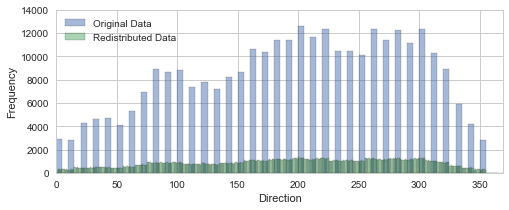

In [27]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


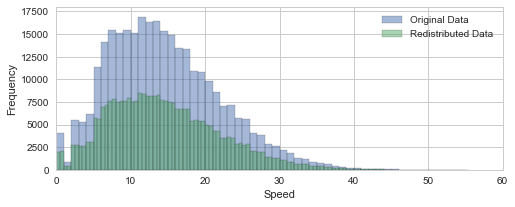

In [28]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.6 Generate (x,y) from (speed,dir)

In [29]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [30]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [31]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: FM-12
Sampling time used: [0]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.283700e+04  42837.000000  42837.000000  42837.000000  42837.000000   
mean   2.012072e+07   1148.978687    193.707245     14.401687      6.518150   
std    1.413668e+04    693.172819     90.990169      7.307112      3.459189   
min    2.010010e+07      0.000000     -4.999025      0.016738      1.000000   
25%    2.011040e+07    500.000000    122.591231      8.800913      4.000000   
50%    2.012070e+07   1100.000000    202.436843     13.517080      7.000000   
75%    2.013100e+07   1800.000000    270.898983     18.978969     10.000000   
max    2.014123e+07   2300.000000    354.971720     55.400516     12.000000   

       dir_windrose             x             y  
count  42837.000000  42837.000000  42837.000000  
mean     191.330789     -2.264119     -2.889908  
std      102.782601     10.596454     11.620859  
min        0.000000    -55.400388    -48.779126  
25%      130.000000     -9.366236    -11.047638  
50%      200.000000     -2.164142     -3.069747  
75%      270.000000      5.074370      5.519009  
max      999.000000     36.558886     37.549351

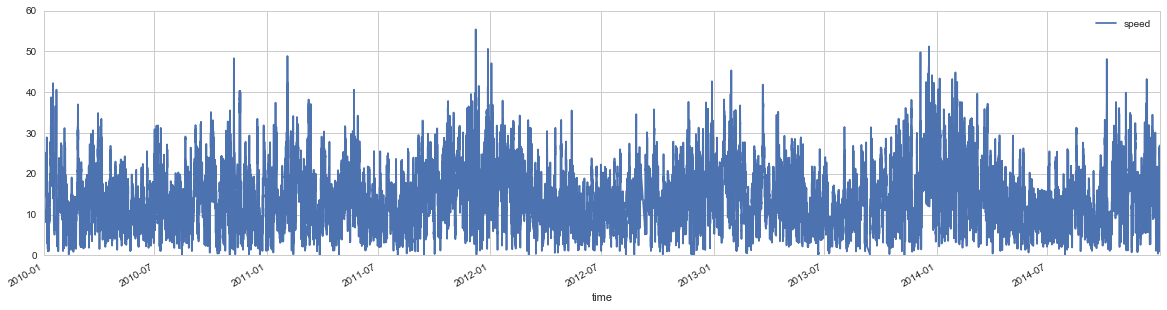

In [32]:
df.plot(y='speed',legend=True,figsize=(20,5))

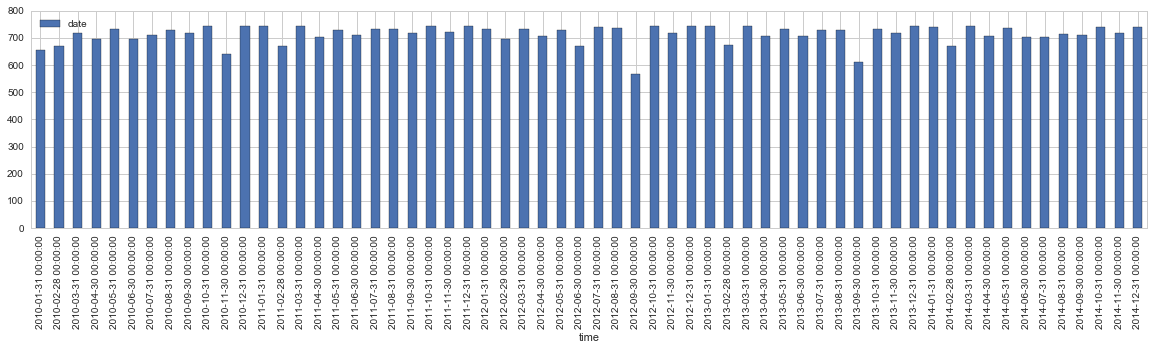

In [33]:
# df['date'].apply(lambda x: str(x)[:-2]).value_counts().sort_index().plot(kind='bar', figsize=(20,4))
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


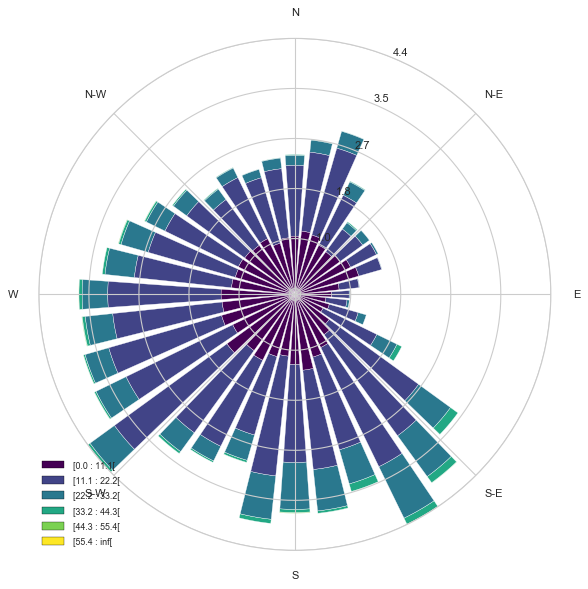

In [34]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [35]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [36]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARsAAADSCAYAAAB6vWTpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XlYVGX/x/H3DPu+uWsgiIim5oqaKIUpLkkqEphhi2Xa
YlqZy6OmxaNYtliZiWUL6hOKZVKpWZiaCQGKZiIoIqYoyKLs65zfH8b8wIV95gzD/bour2uG4cz5
DOjXs9z3/VVIkiQhCIKgYUq5AwiC0DqIYiMIglaIYiMIglaIYiMIglaIYiMIglaIYiMIglZorNio
VCqWL19OQEAAQUFBpKWl1Xg9KioKPz8/AgIC2L59u/rrGzduJCAggClTprBjxw5NxRMEQcsMNfXG
v/zyC2VlZYSHh5OQkEBISAgbNmwAoLy8nNWrVxMREYGZmRnTpk3D29ublJQUjh8/zv/+9z+Ki4vZ
vHmzpuIJgqBlGis28fHxjBgxAoB+/fpx6tQp9WspKSk4OjpiY2MDwMCBA4mNjeX06dO4ubnxwgsv
UFBQwOuvv66peIIgaJnGik1BQQGWlpbq5wYGBlRUVGBoaEhBQQFWVlbq1ywsLCgoKCA3N5f09HQ+
/fRTLl26xJw5c9i7dy8KheKu+4mPj9fURxAEoQ4DBw6s9/dqrNhYWlpSWFiofq5SqTA0NLzja4WF
hVhZWWFra4uLiwvGxsa4uLhgYmJCTk4ODg4Ote6rIR9YG+Lj40WmetDFTKCbuXQ1U0No7ALxgAED
OHToEAAJCQm4ubmpX+vWrRtpaWlcv36dsrIy4uLi6N+/PwMHDuTw4cNIkkRGRgbFxcXY2tpqKqIg
CFqksSOb0aNHc+TIEQIDA5EkiVWrVhEZGUlRUREBAQEsWrSImTNnIkkSfn5+tG/fnvbt2xMbG8vU
qVORJInly5djYGCgqYiCIGiRxoqNUqnkzTffrPG1bt26qR97e3vj7e1923biorAg6CcxqE8QBK0Q
xUYQBK0QxUYQBK3Q2DWb1kKlUpGbm3vb1wRBqEkUmybKzc3lq91xWFhaA1BYkMd9juLHKgi3EqdR
zcDC0horazusrO3URUcQGuuJJ57g5MmTAJSVlTFw4EAiIyPVrwcFBZGYmHjbdocOHSI8PJxLly7x
6KOP1nt/w4cPV79vSkpKE9PfnfgvWMNuPc2ys7NDqRQ1vqVYsGBBs68+4O/vzzvvvHPX14cPH05c
XBx9+/YlPj4eT09PTpw4AUBpaSmXL1/G3d39tu1GjhwJwKVLl5o1b3MRf+s1rOo0KyIqma92x912
fUcQbnX//fcTFxcHwMGDB/H396ewsJD8/HyOHz+Oh4cHsbGxTJs2jccff5zFixdTXl7Ot99+y9q1
awHIyclh9uzZ+Pv7s379egAWLVqkHtV/6NAhFi1apNXPJY5s6uFOF4EbcoRSdZoltDzvvPNOrUch
mtCrVy/Onz+PJEnExsbyyiuv0Lt3b/744w+SkpLw9PRk2bJlbNu2DQcHBz744AO+++479dxDgKKi
It555x3Mzc2ZPn06o0aN0upnuBNRbOrhTheBn/AdVOcEUUFoDKVSibu7O4cOHaJt27YYGxvTr18/
jh07xpkzZ5g+fTrLli1j3rx5AJSUlHD//ffj5OSkfg93d3f1ygp9+vQhNTW1xj7kaBcnTqPqqakX
gffuCuOjVa+QnJysgXSCvhk+fDgbN25UrwnVo0cPTp8+jUqlws7Ojg4dOvDJJ58QFhbG7NmzGTp0
aI3tU1JSKCwspKKigpMnT9K9e3eMjY25du0aAKdPn9b6ZxLFRgsO/7KLsE9X8XdCNKNGjWLjxo1I
koRKpSI7O7vGHzFGR4Cb123i4+Px8vICwNDQECsrKzw8PFAqlfznP/9h1qxZBAYGsm3bthqrKgDY
2Ngwf/58AgMD8fHxwdXVFX9/f7788kuefPJJMjIytP6ZxGmUhv34449s27QWKxs7Jvg9zb7vNjN7
9mz27NnD22+/zQ9HUsXpmXCbzp07k5SUVONrn3zyifqxp6cnnp6eNV6fMmWK+vHu3btve88+ffrU
uIVe5ciRIwCEhYU1KXNdxJGNBh08eJBZs2ZhbGzC62+F8sBYPw4ePMiDDz7I999/j5eXF/+kJosx
OkKrIIqNhpw4cQJfX19UKhXPLViNi1tvADp16sT+/fsJCQkhKyuLdcEvs+2zd6goL5M5sSBolig2
GnDlyhXGjh1LXl4eH3/8Mb36etR43cDAgIULF/LTTz/Rpn1nfozYzIpXHiMj/aJMiQVB80SxaWZ5
N3JYtGgRV69eZd26dfj5+alfU6lU5OTkqC8Gd+3alSVrvsRrzBRSz/7Nfxc+yZYtW2S5LSkImiYu
EDej4qJC1oe8xuXLl1m8eDFz584lOztb/XpRYT479mfh0LYdAJlXL2Fl48CsV/5L30GefPbBcubN
m8fhw4cJDQ3F3t5ero8i/OtOAzqbqrVOWRHFpplUlJfxwVsvkZZyhrFjx/Lf//73jt9nbmmlHk1c
kH9D/fWhI8fRobMTkWHvsHPnThITEzl27BgFBQXq72mtf0nldOuAzqZqzXccNVZsVCoVK1asICkp
CWNjY4KDg2uMcIyKimL9+vUYGhri5+ennqU6efJkdb+pLl26sHr1ak1FbDYqlYpP1y7m1PGj9B3o
yfz582vtdXU3Dm078v333/Paa68RFhZGaGgo5ZZuWFhat+q/pHKTY7pJTEwM8+bNw9XVFUmSuH79
Os8//zzjx4+/4/enp6dz5syZO67rrSt0qv2ulZUVkiRp/H5/c5IkiR1frePowZ9w6zWAZ+a9iYFB
4wfmGRgYsHr1asLDw3nvvfdYsOprMa+qlRo6dCjvv/8+cHMszLvvvouzszM9e/a87Xujo6M5f/58
6yw2jWm/26lTJ4qLi3n66aepqKjglVdeoV+/fpqK2CzWrVvHgT076OLkymsrP0ElqYCiJr1n586d
mTVrFh9//DExh/fi80hQ84QVWixTU1MCAgL46aef2LJlC1evXiUzMxNvb2/mzp1LaGgoJSUl9O/f
HysrKz7++GMkSaKwsFBdpOSmU+13TU1NmTlzJv7+/ly4cIFnn32WvXv31pjNeieabsF7/fp1rl7N
I7+gGIDCghskJBSRkJBAcHAwNnZteHJuMDfyCyksuIGrvbU6U/Vtr2VmYmBgTEXlzfe99XnV+9ra
2jJ+/Hg2btzI7u2f06u/FyUlherXGksXWxXrYibgjr+/5lD9d1yb5ORkcnJyavx8rl+/TnR0NEOG
DGHKlCmUlZXx4osvMnLkSMaMGUN6ejq2trbs37+fGTNmYGdnx65du9i8eTOTJk1qlvxNoVPtd52d
nXFyckKhUODs7IytrS3Xrl2jY8eOte5L021Js7OzOZeTrD6duXHdBEfHdgQHBwPw0pL36XnvferX
btzIUB+R5eTk0D47C2sbOxRSGQaGxrRr3wngtudV72tvb0/Xrl0JCAhgy5YtpCTGMnCYN/36uTX6
mo2utm/VtUxQM9etv/umys8zq9fvsaKigmPHjqlzxMfHY2ZmhpeXF5mZmWzbtg1LS0tUKhUDBw4k
LS1N/Tg3N5fdu3djbm5ORkYGAwYM0MjPuaH/UWis2AwYMIADBw4wfvz4WtvvmpubExcXx8yZM4mI
iCA5OZkVK1aQkZFBQUEBbdu21VTERisqzOfL785z6NBhOju54tCuU43XDv+Tw7XKm7O7q25vW9vU
/Zf11lvjHdw8MTQKZ9f/PqXf4JGa+TBCnQoL8mR/r6KiInbs2MHUqVMpLi7mzTffJC0tje3btyNJ
EkqlUj2Jd9myZezfvx9LS0sWLlyoM+O2dKr97tSpU1m8eDHTpk1DoVCwatWqOk+h5JKSdAKVqpL+
Hl63vWZmbnn

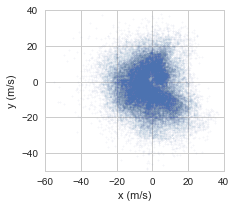

In [37]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2. Overview by Direction

In [38]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [39]:
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEGlJREFUeJzt3X1MU9f/B/B3KTIYBakPdIsGJyJzIGAVZcaBW3yaY3wR
xA0VMOKcmCyTPUWdAgZQq4smxjg2BDeGczIVjPFpEzPlO5kSGCKCOotfZQ8C5cm1BQTp+f1BuD86
CvRAWaF+XgkJ9/T03s8pvHvPvb1tRYwxBkKI0azMXQAhww2FhhBOFBpCOFFoCOFEoSGEE4WGEE4W
FZq2tjYkJibCz88Pfn5+2L17N9rb203WHwA0Gg2CgoLQ2NjYY5/4+Hi8+OKLej+JiYk99r979y5W
rlwJHx8fBAYGIi8vr+/B9mHNmjXdakhPT++xf2FhIUJCQuDt7Y2lS5eitLRUuO3HH3/E5s2b+13L
6dOnERoa2q09OzsbixYtglwux7Jly1BQUCDc9s/aO38GUofJMAuiUCjYggULWHFxMbty5QqbM2cO
O3DggMn6M8ZYUlIS++KLL3rtEx4ezj7//HNWU1Mj/KjVaoN9m5ubWUBAAIuLi2NKpZIdOHCAeXl5
sfv37/c94F74+/uznJwcvRqampoM9q2qqmJyuZzt27ePKZVKtm3bNubn58cePXok9Fm6dCm7du0a
dx0///wz8/HxYSEhIXrt+fn5zMvLi50+fZo9ePCAffbZZ2zatGmsqqqKMcb06q6pqWEnTpxgnp6e
rLS0lLsGU7OY0LS0tDAfHx+Wm5srtGVnZ7PZs2ez9vb2AfdnrOMPOW3aNNbY2NhrLbNmzWKXL182
qu6cnBw2e/Zs1traKrRFREQwhUJh1P0NUavVzN3dnSmVSqP679+/ny1ZskRY1ul0bN68eSwzM1Ov
zoiICK46FAoF8/T0ZG+++Wa30CQlJbHo6Gi9bU6dOpWdP3++23q0Wi3z9/dnKSkpXNsfLBYzPbt1
6xaam5sxa9Ysoc3X1xd1dXWorKwccH8AyMrKglwux8iRI3usQ6VSobGxERMnTjSq7l9//RVyuRwj
RowQ2mbOnIni4mKj7m+IUqmEtbU1XFxcjOpfXFyMmTNnCssikQgzZszQq+G1115DcXEx7ty5Y3Qd
V69eRUZGBhYuXNjtNqlUipKSEpSVlYExhuzsbDDG4O7u3q3vV199hREjRiA6OtrobQ8miwlNdXU1
7Ozs4ODgILSNHTsWAFBVVTXg/gBw6dIl+Pv791qHUqmESCTCwYMHMXfuXLzxxhs4dOgQdDqdwf41
NTVwdnbWaxszZgyqq6t73U5fNUgkEmzatAmvvPIKgoODkZOT02N/Y2oYOXIkvLy8cPnyZaPryMnJ
wYwZMwzeFhUVBS8vL4SGhsLT0xNbt27Frl27uj3ZtLS0ICMjA+vWrYONjY3R2x5MFhOa5uZmPPPM
M3ptnQ9ya2vrgPu3t7ejvLwcbm5uvdZx7949WFlZwcXFBampqYiOjsaBAweQlpbGVbehGoxVUVGB
lpYWzJ49G2lpaViyZAni4uJw5syZAdXg5uaGmzdv9ruurmpqaqBWq5GYmIhjx45h1apViI+Px927
d/X6nT59GlZWVggODjbJdk3B2twFmIqtrW23P3Lnsp2d3YD7NzY2or29HVKpVGh75513UFRUJCyf
OXMGK1asQGBgIJycnAB0nAV69OgRvv76a7z77rtG12Fra2twnIGBgfjrr7+EZUPTuI8//hgxMTHC
NHLKlCn4/fffkZmZicDAwH7X4OTkhHv37hmsi1dCQgLmzJmDt99+GwDg6emJ8vJypKenQ6FQCP3O
nj2LxYsXdwu1OVlMaJ577jk0NTVBo9FAIpEA6Di+AACZTDbg/iKRCAD0plnbt29HS0uLsOzs7AyR
SCQEppObmxtqa2vR3t4OsVisd5tMJhO220mlUhmsAQBSU1Px5MkTg7d1EovF3Y67Jk2ahEuXLhns
b2wN7e3tsLIyzeSktLQUERERem1Tp05FSUmJsNzU1ISCggKsXbvWJNs0FYuZnk2ZMgV2dnZ6z/yF
hYUYM2aMwQNi3v5SqRTW1tZoaGgQ2mQyGSZMmCD8WFtbY/v27Vi9erXefW/evIkXXnihW2AAQC6X
o7i4WC8IhYWFkMvlBsc5btw4vW0a8t5772HLli16bWVlZXB1dTXYXy6Xo7CwUFhmjAknKLpqaGgQ
jvsGSiaTQalU6rUplUq9x768vByMMUyfPt0k2zQViwmNra0twsLCkJiYiKKiIvzyyy/Ys2cPoqKi
hD6NjY3Ci5LG9O9KJBLBw8Ojz7NH8+fPx9WrV5GamorKykqcPHkSaWlpWL9+PYCOZ2uVSiXsoTrP
LMXFxaGiogIpKSm4ceMGwsPD+/1YzJ8/HydPnsSJEydQWVmJjIwMnDp1CjExMQA6pl4qlUqYkoWF
hUGpVGLv3r2oqKhAUlIStFotgoKC9NZ7584deHl5Aeg4QFepVH2+GNyTlStXIj09HWfOnEFlZSVS
U1Nx5coVrFq1Sm9748ePH1JTMwAQMWa+N6F1fZY3hdbWVmRkZODq1asYMWIEAgICEB4eLkwpkpKS
AHT8gxrT/5+ys7Nx9+5dbNy4sdc6CgoKkJ2djYcPH0IqlSIoKAjz5s0D0DHt2bBhA9atW4e5c+cC
AO7fv49Dhw7hwYMHkMlkiIiIgLe394Aei9zcXJw7dw61tbWQyWRYtmyZcFq5vLwcycnJ2Lp1Kzw8
PAB07A2/+eYbVFdXw8XFBatXr9bbMzU1NWHdunXYvXs3nn/+eVy+fBlffvkl9u3b1+fe5/jx4ygu
Lsb27duFNsYYfvjhB1y4cAH19fUYN24cli9fDk9PT6HPsWPHUFpa2uvVFIOppzN/Zn1xs7Cw0Jyb
51ZVVcV8fHyYSqXq9zqG25g7HT16lEVFRem1rV27ts/HYriOt7e6LWZ69m+QyWQICQlBVlaWuUv5
VzHG8N133wlTTKDjRVkrKyuMGTPGjJWZB4WG04cffoizZ8/2esGmpTl//jzc3d3x8ssvC23e3t5I
SUkxY1XmYzGnnP8tDg4OPb5IaKkWL16MxYsX67VZWz+9/zq0pyGEE4WGEE4UGkI4UWgI4UShIYQT
hYYQThQaQjhRaAjhZFRoSkpKEBkZCQB48OABli9fjhUrViAhIUF4f8n333+P0NBQvPXWW/jpp58G
r2JCzKzP0Bw8eBBbt27F48ePAQA7d+5EbGwsjhw5AsYYLl68CJVKhczMTBw9ehTp6enYu3fvgN6u
S8hQ1mdoXFxcsH//fmG5rKxM+ASXgIAA5Ofn48aNG5DL5bCxsYGDgwNcXFxw+/btwauaEDPq8wKi
RYsW4Y8//hCWGWPCW3/t7e2hVquh0Wj0PtXF3t4eGo3GqAJM/Z6a4eBpG7OljZf7qruub9DSarVw
dHSERCKBVqvVa+8aot70+EYfC1VUVPRUjXm4jre3oHOfPfPw8MC1a9cAAHl5efD19YW3tzeKiorw
+PFjqNVqVFRUGPzQN0IsAfeeZuPGjYiLi8PevXvh6uqKRYsWQSwWIzIyEitWrABjDB988MGQe183
IaZi9s8IGI677oF42sY8XMfbW9304iYhnCg0hHCi0BDCiUJDCCcKDSGcKDSEcKLQEMKJQkMIJwoN
IZwoNIRwotAQwolCQwgnCg0hnCg0hHCi0BDCiUJDCCcKDSGcKDSEcKLQEMKJQkMIJwoNIZwoNIRw
otAQwolCQwgnCg0hnLg/lrZTSEgIJBIJAGD8+PGIiYnBpk2bIBKJMHnyZCQkJOh9WDohlqJfoXn8
+DEYY8jMzBTaYmJiEBsbCz8/P8THx+PixYtYsGCByQolZKjo167g9u3baG5uRnR0NKKionD9+nWD
X/ZEiCXq157

## 2.3 Overview by Month

In [40]:
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4HNW9v9/tVWV3pVXvltXcMTY2JriAbappvrQACUm4
JAEC3ITyC+BLC/VCEkhIIUBCIJTQAqHbmOoCxmDLtnpvK2l7r/P7Q+xiIdmWrFEx0fs8eh5pZ+bM
7Gg+c875tiMRBEFgmmmmOSKQTvYFTDPNNCNnWrDTTHMEMS3YaaY5gpgW7DTTHEFMC3aaaY4gpgU7
zTRHENOC/Q9g2nP37WFasBPAypUrKSsr4+677x52e2dnJ2VlZZSVlWGz2UQ997vvvsuGDRsSfz/0
0EPMnz9f1HN4PB5WrFjBm2++KWq70wxlWrAThEQi4Z133hl221tvvTVu5/3rX/+KxWIZt/Y9Hg8/
+clP6OrqGrdzTPM104KdIObPn09HRwd79+4dsu3NN9+krKxsEq5qbGzfvp3169dTU1Mz2ZfyH8O0
YCeIiooK8vLyhvSmXV1d7N69m7Vr1w455p133uHss89m3rx5HH/88fz6178mEokktq9cuZI///nP
bNiwgUWLFrFgwQKuv/56PB4PABdddBHbt29n8+bNlJWV0dHRkTj29ddfZ82aNcyePZuzzjqLzz//
PLGto6ODsrIyHnrooYN+p5/+9KfMnDmTRx999LDuyTSjZ1qwE8jq1auHDIvfeust5s6dS2Zm5qDP
n332Wa644grmzJnDww8/zHe/+10ee+wxbrjhhkH7/fGPf8TlcvHAAw9w9dVX8+9//5tHHnkEgA0b
NlBZWcmCBQt49tlnMZvNAPj9fh588EGuuuoqfvOb3+D3+7nyyisTLwOz2cyzzz7L+vXrD/p9nnrq
KX7zm99gNBrHdF+mGTnyyb6A/yTWrl3LX/7yFxobGykpKQEGhsMnnXTSoP2i0Si//vWvOeWUUxIG
o2XLlpGUlMSGDRv44Q9/SHl5OQCZmZk88MADSCQSli1bxvvvv8+jjz7KokWLOP7449Hr9Wi1Wq69
9lr+9re/AQNW4/vuu4958+YBEIlEuPLKK2loaKC8vBylUpnYdjBmzpwp2r2ZZmRM97ATyOzZs8nK
yuLtt98GoLu7m127drFmzZpB+zU1NWGz2YYMk0855RQAPvvss0FtSiSSxN/p6enAQO/qdruHvQ6Z
TMacOXMSf+fk5AAccP9ppg7Tgp1AJBLJoGHxW2+9xZw5c8jKyhq0n9PpBMBkMg36PCkpCaVSmZij
Amg0miHnkMlkLFu2jLvuumvY61CpVEilX//r47/HYrHD/GbTTBTTgp1gVq9ezZ49e+jo6OCtt94a
MhwGSE1NBcBqtQ763OVyEQqFEtsPxg033MCWLVtwOBziXPg0U4JpwU4wCxYsID09nWeeeYYvv/xy
yHAYoKioCIPBMCQQ4fXXX0+0cSj0ej233347LS0tgyzL0xzZTBudJhipVMqJJ57IE088kZjTfhOZ
TMYVV1zB7bffTkpKCqtWraK2tpaHHnqItWvXjtjYs2zZMtLT09m5cycajYZgMDii40KhEHv37iUz
M3OI9XqayWW6h50EVq9eTTgcHtb3Gue73/0ud955J9u2bePyyy/nqaee4vvf/z7333//qM512223
4ff76e/vp6GhYUTH9Pb2cu655/L888+P6lzTjD+S6ZpO3y46Ojq4+OKL2bRpU+Kzjz76iB/84Ads
3LiR3NzcSby6acbKtGCnmeYIYnpIPM00RxDTgp1mmiOIacFOM80RxLRb51tALBYjGo0mKksIgpD4
XSKRDPqRyWSDQhkng02bNvHwww/j8/lYtmwZN91006Dtvb293HTTTVgsFjQaDffff/+0sewrpo1O
UxhBEAiHw4RCIcLhcOInGAwmPotEIqMOKZTJZCgUChQKBUqlEqVSmfhboVCgUqmQy8fnXd7e3s4F
F1zA888/j8lk4pJLLuGyyy5j+fLliX2+973vsWbNGs4//3z+8Y9/sGXLFn7729+Oy/UcaUwLdoog
CAKhUAifz4fX68Xr9eLz+YjFYkil0sSPXC5HLpcnhKZSqRK/x0UmlUqJRqN88cUXzJs3D4lEgiAI
RCIRQqEQwWBwiOjjwo/FYgiCgEKhQKvVJrJ9tFqtKCJ+7LHHsFgs3HjjjQBYLBaUSiUGgwEAm83G
ySefzJYtW5BIJIRCIbq6uigsLBzzub8NTA+JJ4lIJILb7R4iTrlcjkKhQKPRYDKZSElJQaFQjOlc
8eB+mUyGSqUiKSnpgPsKgoDf78fpdOL1eunv7yccDhOLxQaJWKfTodfrRz28bm1tRalU8oMf/IDe
3l5WrlzJ1Vdfndje3t5OdnY2d999N1u2bCErK4tbbrnl8L74t5BpwU4gwWAQh8OB3W7H6/UmhqZa
rZb09HRSUlKQyWSTeo0SiSTRo+5PKBTCbrfjcrno6+ujq6sLiURCSkoKqampI772aDTKhx9+yFNP
PYVOp+MnP/kJL730EmeddRYw8CLbs2cPP/nJT7jxxht5/vnnueGGG3jyySfH5fseaUwLdhwRBAGf
z4fdbsfhcBAMBlEoFOj1enJycg7a0001lEolGRkZZGRkAAOGLpvNhtVqpa2tjWg0ik6nw2g0kpKS
gkqlGradtLQ0lixZkkgdXLVqFbt27UoINj09Ha1WywknnADAqaeeyh133DEB3/DIYFqwIiMIQmIo
6XA4iMViqFQqUlNTycjIGPPwdqoglUpJS0sjLS0NAK/XS29vLz09PbS3t6NSqTAYDKSnp6NUKhPH
rVixguuuuw6n04ler+ejjz5i5cqVie35+flkZWWxadMmVq5cyfvvv09lZeWEf7+pyrTRSSSi0Sh2
ux2LxUIwGESlUmEymTCbzYOSxSfyeuJGp4keZgeDQSwWCw6Hg3A4TEpKCmazmaSkJCQSCf/85z95
4oknCIfDLFmyhJtvvplbbrmFlStXsmrVKpqamtiwYQN2ux2dTsfdd99NUVHRhH6Hqcq0YMdIIBCg
t7eX/v5+pFIpqamp5OTkTHpPOpmC3R+Px0NnZyderxe5XE5GRgYmk2nc3Ebfdqbv2mEgCAIOhwOL
xYLX60WtVlNQUIDRaJz0oISphl6vp6ysjGg0Snd3Nz09PXR2dmI0GjGbzUOMW9McnOkedhQIgoDN
ZqOzs5NoNIperycvLw+1Wj3ZlzaEqdLDDofdbqerq4tAIIBeryc3NxedTjfZl3VEMN3DjgBBEHC5
XLS3txMOhzEYDOTl5U05IRwpGAwGDAYDfr+f1tZWampqElOJqfjym0pMC/YQeDwe2tvb8fv9pKam
UlBQMC1UkdBoNJSXl+P3+2lubmbPnj2YTCays7MHWZan+ZppwR4Av99PR0cHbrebpKQkZs+ePemG
pG8rGo2GyspKPB4PLS0tVFdXYzabyczMnDZOfYPpu/ENIpEI7e3t2Gw2tFotFRUVQ2r/TjM+6PV6
Zs2ahc1mo6Ojg76+PrKyssjIyJg25n3FtGD3w26309railQqpbS0lOTk5Mm+pP9IjEYjRqORrq4u
uru7sdlsFBcXT89vmRYsMNCrtra24nQ6SU9PJycnZ1KCHaYZTHZ2NmazmYaGBvbu3Ut2dvZ/fG/7
Hy9Yu91OS0sLCoVievgrItdeey179uxJ9IpXXHEFJ554YmL7li1buOeee4hGo+Tk5HDPPfeQkpIy
pB25XE55eTn9/f2Jqcp/cm/7H+uH3b9XzcjIIDs7+1v15p5sP+zq1at57rnnhl1WJBqNsmLFCh5/
/HFKSkq4//77kUqlXHvttQdtMxqN0tDQgNfr/Y/tbafMuC++iPD7778/6POVK1cOWog4HA4zf/58
bDZb4rOLLrq

# 3. Create input data and configuration

In [41]:
SPEED_SET = array(list(zip(df.x, df.y)))
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [42]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28]


In [43]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [44]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [45]:
%%time
from sklearn.grid_search import GridSearchCV
# from sklearn.model_selection import GridSearchCV  ## too slow

# The bandwidth value sometimes would be too radical
if knot_unit:
    bandwidth_range = arange(0.7,2,0.2)
else:
    bandwidth_range = arange(0.4,1,0.1)

# Grid search is unable to deal with too many data (a long time is needed)
if len(sample) > 50000:    
    df_resample=df.sample(n=50000, replace=True)
    bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
else:
    bandwidth_search_sample = sample

grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

grid.fit(bandwidth_search_sample)
bandwidth = grid.best_params_['bandwidth']
print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


1.9
Wall time: 2min 3s


In [46]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 1.9 3249
[  4.28984611e-06   4.84735429e-06   5.34048041e-06   5.88249367e-06
   6.80932609e-06]


In [47]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXl0LHd9J/qptTe1dl3tulfSxZ7YIcTXOMaHBA9OfEIM
JwnPg8HO4zGDGbaBF7YhHl7AjMNikvOCHTCcN/bxAZtHjEMmDMET8uIFDHgOxCEG4ni7kq62Vi9S
79VLre+P1q9UVV3VXVXdLal163POPVdS969+1d1Vn/6uny+laZqGAAECBDihoI/6BAIECBCglwhI
LkCAACcaAckFCBDgRCMguQABApxoBCQXIECAE42A5AIECHCiEZBcgAABTjQCkgsQIMCJRkByAQIE
ONEISC5AgAAnGgHJBQgQ4EQjILkAAQKcaAQkFyBAgBONgOQCBAhwohGQXIAAAU40ApILECDAiUZA
cgECBDjRCEguQIAAJxoByQUIEOBEIyC5AAECnGgEJBcgQIATjYDkAgQIcKIRkFyAAAFONAKSCxAg
wIlGQHIBAgQ40WCP+gQCHD00TYMoipBlGQzDgOM40DQNiqKO+tQCBOgYlKZp2lGfRICjQ71eR6FQ
QDwehyRJAIBEIoGRkRHE43HQNB2QXoC+RmDJXcRQFAXVahWZTAaxWAyyLIPjOGiaBk3ToCgKZFmG
KIqgKAoMwwSkF6DvEJDcRQhN0yDLMhRFAUVRUBQFKysrUBQFLMtCVVVUKhWEQiGw7MElQkivXq+D
pmkwDAOGYcCybEB6AY4tAnf1IoOqqpAkCeRj39nZQTabxcLCAniehyiKSCaToCgKkiSBZVlEo1FE
IhFEo1EwDGM6HjkORVE62bEs2/S8AAGOCoEld5GAuJ+KogAAZFnG1tYWVFUFx3GIx+MQRRHhcBgc
x2FoaAixWAz1eh2VSgWFQgGpVEonPUJ8RjKTZRmapqFerwekF+DYICC5iwCqqkKWZaiqCoqiUCqV
sL29jdHRUQwODmJjY8P0fIqioGkaKIpCOBxGOBzG6OgoNE1DrVZDtVpFPp9HMpkEx3E64bUiPZpu
VCtJkoTBwcGA9AIcGgKSO+EgcTSSTEgmkygWi5ifn9ctNbcRC4qidDIzkl6lUkE+n8fOzg54nje5
t4TcNE1DtVpFOp3WExjk/8DSC9BLBCR3QmF1T0VRxObmJniex/Lysp5Q6CRZYCQ9oGExEksvl8th
Z2cHoVBIJzyyhliKVksvIL0AvUBAcicQVvc0l8shmUzi1KlTGB0dbSI2qyVHSMgraJrW43VjY2M6
6VUqFWSzWdRqNQDA7u6uTo5GSy8gvQC9QEByJwxG91RVVezs7KBarWJxcRHhcLjp+b0s+zCSHgAI
goB0Og0A2NvbQ71eRzgc1i29cDgckF6AriMguRMCTdOQSqUQjUYRCoVQq9WwubmJWCyG5eVlnTyc
1gK9JTygQXo0TWN8fBxAw+KsVquoVCrY3d3VSY/E9NySHs/zQY1eAEcEJHcCQGrfcrkcWJZFqVRC
JpPBzMwMhoaGWq61Iwe/7mo7WPeiaRqxWAyxWAzAQQcG6cIQRVF3a4mlR45hJT1RFKEoCkZGRsBx
XEB6AXQEJNfnIJ0LBMQdXF5eBs/zro5xXOrBGYbBwMAABgYGAByQXqVSQTqdhiRJTZYeITOS8IhE
IqjVaqaOjID0Lm4EJNensLZmlctlVKtVxONxzM/Pu76pnZ53HIivFemlUinIsqyTHiF6q6UnSVJA
ehc5ApLrQxiTCwCQSqWQy+UQDocxPDzc8Q18XAnASnqyLOukVy6X9ZIZYumFQqGA9AIEJNdPsNa+
SZKEra0tUBSF5eVlJBIJz8fsVfztMMCyLOLxOOLxOEKhEKrVKgYGBvTiZEVR9HheNBo1JSiMpEcS
GYT4AtI7WQhIrk9grX0rFovY3t7G+Pg4xsfHTUW23UA/Eh9N0zrpAQ1Lr1Kp6G1oRivPSnqqquoJ
HCPpsSwLlmUD0utjBCTXB1AURRe01DQNOzs7KJVKOH36tF6DBvizyox9qsa/9RvsXjfLshgcHMTg
4CCAhuVL3Nt8Pg9VVU2WntGCM5KeJEkolUqYnJwMSK8PEZDcMYY1uUBq38LhMM6ePRsUxFrQjng4
jgPHcSbSI5ZeNpuFpmkmS4+QHrEIiXtLUVRg6fURApI7pjC6pwCQzWaRSqUwOTmJkZGRrtW3GWNU
nRynH0EkpYaGhqBpmsnSy2azAIBIJKILiRotXqOlF5De8UZAcscQuVwODMMgFApBVVUkEgnUajXH
1iyCi4WcegGKosDzPHieN5FepVJBqVRCvV7H2tqaraUHBKR3nBGQ3DECcU93d3cxODgIRVGwubmJ
eDzetjWrE1AUpd+gRrnzfkK3yd1IehzHIZvNYnJyEpVKBYIgYHd3FzRN64QXiUQcSQ+AaT4GwzAB
6R0i+vOKPoEw1r6R7KkgCK5aswj8WnKapuHChQumrCLP85AkCRzHeT7eUaFXxKFpmv6e8DyP4eFh
fYwjqdEjOnnGRIbRggtI7+gQkNwRw1r7pigKBEEATdOeWrMAfyRXLBYBAPF4HHNzc5AkCel0GqIo
Yn19HQzD6Det3YyHixUURSEUCiEUCmFkZMREeqVSSSc9o1S8E+llMhkMDw8jFovpCisB6XUPAckd
IZxkyVmWxfDwsCeC8wqiWlIoFEBRFMbGxqAoCnie13tCR0dHUa/XUa1WUSwWkUqlWsqdn1RYS2zs
YEd61veOZVmTe0tIr1ar6ZlbURQBoGk+RkB6/hGQ3BHB2pqVTCaRz+cxNzeHYrHo66J2a8kRlWCW
ZbG8vIyXXnpJv5Gt/5MZD+TGJSKYRuVfYq0YpZFOEvyEAOzeO6ehQMYsOvnciXVvnXkbkJ53BCR3
yLDWvkmSpBPO2bNndakkvzdWu3V2nRJejk8sOKvyr1UPziqNZHz9vYAba6sTdKMf2GkokKIo+nwM
o6VnJLOA9PwjILlDhNU9LRQKSCQSmJiYwNjYmH6hdlIK4rTO6J5aOyVarWsFq/KvnUqIMRDfr+gF
gRq/MIrFIqampqBpmuNQoID0/CMguUOCUfdN0zQkEgkIgoAzZ87og2AI/JKc0zqre2otE7HeEKSk
xCtaqYSQ3lEAyOfzTXVmFzOM2Vu3Q4HIfIyA9NojILkew6k1KxKJYHl52TZw3wnJWcnJrXvaC2vF
qBICNGY8JJNJ1Go1vaPAmH3spFyll0XQvXaF7Y7vZigQiYcahwIZSU+WZYiiiEQigdnZWXAcd1GS
XkByPYSxsR5oDG9Jp9OYmprCyMiI4zq/lpSRHI0zVu3cU+u6wwC5wYhrRjoKyuUyMpmM6cYm2Ucv
6Ncb1w2JWkMDRtJrNxSIxP1ImYvR0uM4zkSOJxEByfUApPbt2WefxdmzZwEAiUQCoihiaWkJoVCo
5fpO27PauadO59yNmKBbGDsKrMW1xnIVayD+KHAUllw72JGe3VCgSCTSlLkFzJbeSSe9gOS6DGtj
PXHRBgcHMTc356rEohN3tV6vY2VlpSmZ0W7dUcOuzuxiLFfxC+tQICPpAcDq6mrLzLcd6TEMo9fr
HYdrxC8CkusirLVvpLl+dnZWl/dxC68kp2kaisUiqtUqzpw54zmbad3vqBv9vZar9NLaOo6WXDsQ
0otEIsjn81haWtInoZGOFqdJaMDBtWyViu9H0gtIrgsg7qksy7r+2NbWFjRNw8LCgp5tdAuvlhxx
T1VVRTwe90xwdtnV44ZW5SrpdBr1el13tayqv8cdh0HQXoYCGSehWRMZ9XodFEU1dWQcZwQk1yGc
WrNGR0chy7KvC8DLBU+ypxMTE6BpWndPTjqsN20qlYKqqhBF0SR1bqf66xW9JiGgt+ICdse2Iz0i
IGqscSSWnnE

In [48]:
kde_cdf = cdf_from_pdf(kde_result)

# 5. GMM by Expectation-maximization

In [49]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [50]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight   mean_x   mean_y  sig_x  sig_y    corr
1  0.360  -10.818   -3.365  8.389  9.400  -0.162
2  0.322    0.372    6.955  7.258  8.071   0.118
3  0.318    4.754  -12.348  9.003  8.416  -0.138

GMM Plot Result
0.359960489312 [[-10.81771599  -3.36473419]] [ 7.98284203  9.74686129] -152.553412459
0.322457239306 [[ 0.37247466  6.95492983]] [ 7.04253396  8.2596754 ] 155.973375773
0.317582271382 [[  4.75380549 -12.34767827]] [ 8.01802083  9.3592233 ] -121.96673599


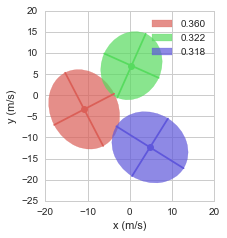

In [51]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [52]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQLFd9JvrlVmvvy+2+vd3b3ReJkbBAQmPgEWzCGrCM
bQjZMhL287Pl5wUbbAxj6zFha4KxWWwPtsFgh63Q8MDBA9meIABNODCCsVgm2IzwWKy379JLdXVV
d1XXkrXkdt4fWSfrZFZmVmYtfbta+UVcqburTp6sqsyvvt/OEUIIIkSIEOGMgr/RJxAhQoQIw0RE
chEiRDjTiEguQoQIZxoRyUWIEOFMIyK5CBEinGlEJBchQoQzjYjkIkSIcKYRkVyECBHONCKSixAh
wplGRHIRIkQ404hILkKECGcaEclFiBDhTCMiuQgRIpxpRCQXIUKEM42I5CJEiHCmEZFchAgRzjQi
kosQIcKZRkRyESJEONOISC5ChAhnGhHJRYgQ4UwjIrkIESKcaUQkFyFChDONiOQiRIhwphGRXIQI
Ec40IpKLECHCmYZ4o08gwo0HIQSKokDTNAiCAEmSwPM8OI670acWIULf4Agh5EafRIQbh2aziVKp
hPHxcaiqCgDIZDKYnp7G+Pg4eJ6PSC/CSCNScs9g6LqOer2OfD6PdDoNTdMgSRIIISCEQNd1aJoG
RVHAcRwEQYhIL8LIISK5ZyAIIdA0Dbqug+M46LqOra0t6LoOURRhGAZqtRri8ThEsX2JUNJrNpvg
eR6CIEAQBIiiGJFehFOLyFx9hsEwDKiqCvqx7+/vo1AoYG1tDbFYDIqiIJvNguM4qKoKURSRSqWQ
TCaRSqUgCILtePQ4HMdZZCeKYsfzIkS4UYiU3DME1PzUdR0AoGkadnd3YRgGJEnC+Pg4FEVBIpGA
JEmYnJxEOp1Gs9lErVZDqVTCwcGBRXqU+Fgy0zQNhBA0m82I9CKcGkQk9wyAYRjQNA2GYYDjOFQq
Fezt7WFmZgYTExPY3t62PZ/jOBBCwHEcEokEEokEZmZmQAhBo9FAvV7H8fExstksJEmyCM+P9Hje
zFZSVRUTExMR6UU4MUQkd8ZB/Wg0mJDNZlEul7G6umoptaAeC47jLDJjSa9Wq+H4+Bj7+/uIxWI2
85aSGyEE9XoduVzOCmDQ/0dKL8IwEZHcGYXTPFUUBTs7O4jFYtjc3LQCCv0EC1jSA0zFSJVesVjE
/v4+4vG4RXh0DVWKTqUXkV6EYSAiuTMIp3laLBaRzWZx7tw5zMzMdBCbU8lREgoLnuctf93s7KxF
erVaDYVCAY1GAwBweHhokSOr9CLSizAMRCR3xsCap4ZhYH9/H/V6Hevr60gkEh3PH2baB0t6ACDL
MnK5HADg6OgIzWYTiUTCUnqJRCIivQgDR0RyZwSEEBwcHCCVSiEej6PRaGBnZwfpdBqbm5sWeXit
BYZLeIBJejzPY25uDoCpOOv1Omq1Gg4PDy3Soz69oKQXi8WiHL0InohI7gyA5r4Vi0WIoohKpYJ8
Po+lpSVMTk76rnUjh17N1W5w7sXzPNLpNNLpNIB2BQatwlAUxTJrqdKjx3CSnqIo0HUd09PTkCQp
Ir0IFiKSG3HQygUKag5ubm4iFosFOsZpyQcXBAFjY2MYGxsD0Ca9Wq2GXC4HVVU7lB4lMxrwSCaT
aDQatoqMiPSe2YhIbkThLM2qVquo1+sYHx/H6upq4Jva63mngfj8SO/g4ACaplmkR4neqfRUVY1I
7xmOiORGEGxwAQAODg5QLBaRSCQwNTXV9w18WgnASXqaplmkV61WrZQZqvTi8XhEehEikhslOHPf
VFXF7u4uOI7D5uYmMplM6GMOy/92EhBFEePj4xgfH0c8Hke9XsfY2JiVnKzruuXPS6VStgAFS3o0
kEGJLyK9s4WI5EYEzty3crmMvb09zM3NYW5uzpZkOwiMIvHxPG+RHmAqvVqtZpWhsSrPSXqGYVgB
HJb0RFGEKIoR6Y0wIpIbAei6bjW0JIRgf38flUoFFy5csHLQgN5UGVunyv5t1OD2ukVRxMTEBCYm
JgCYypeat8fHxzAMw6b0WAXHkp6qqqhUKlhYWIhIbwQRkdwphjO4QHPfEokELl26FCXEOtCNeCRJ
giRJNtKjSq9QKIAQYlN6lPSoIqTmLcdxkdIbIUQkd0rBmqcAUCgUcHBwgIWFBUxPTw8sv431UfVz
nFEEbSk1OTkJQohN6RUKBQBAMpm0GomyipdVehHpnW5EJHcKUSwWIQgC4vE4DMNAJpNBo9HwLM2i
eKaQ0zDAcRxisRhisZiN9Gq1GiqVCprNJq5eveqq9ICI9E4zIpI7RaDm6eHhISYmJqDrOnZ2djA+
Pt61NKsfnAVyHPT5s6QnSRIKhQIWFhZQq9UgyzIODw/B87xFeMlk0pP0ANjmYwiCEJHeCSIiuVMC
NveNRk9lWQ5UmkUxKLIaVdIbFnEQQqwa2VgshqmpKWuMI83Ro33y2EAGq+Ai0rtxiEjuBsOZ+6br
OmRZBs/zoUqzgN7JaVRJ7UaC4zjE43HE43FMT0/bSK9SqVikx7aK9yK9fD6PqakppNNpq8NKRHqD
Q0RyNxBebclFUcTU1FQogoswPDhTbNzgRnrNZhP1eh3lctmaj8Gat5T0Go2GFblVFAUAOuZjRKTX
OyKSu0FwlmZls1kcHx9jZWUF5XK5p4u6H0V2eHiIcrmMRCJhjSaMYKJXdUznY7Ck5zYUiI2i08+d
qnvnzNuI9MIjupJPGM7cN1VVsbOzA1EUcenSJatV0kmZnfQGq1QqOHfunK0WtF6v28ytQQQ+hmUW
B1Fb/WAQ9cBeQ4F0XbfmY7BKjyWziPR6R0RyJwineVoqlZDJZDA/P4/Z2VnrQu1HkYVZV6vVsLOz
A47jsLa2Zs1soF2FaR0obV0ej8ct0mMbWgbFqN6IwyBQdj5GuVzG4uIiCCGeQ4Ei0usdEcmdENi+
b4QQZDIZyLKMixcvWoNgKIYdQCCE4OjoCPl8HsvLy8hkMq5lXfTmovMaqMpjG1pS0mM7fkQIBzZ6
G3QoEFXWEel1R0RyQ4ZXaVYymcTm5qZraVY/JEd9O17QNA17e3vQNM2K3mYyma5qxauLb61WQzab
haZpnh0/TgLDjA4P2xR2O36QoUBUWbNDgVjS0zQNiqIgk8lgeXkZkiQ9I0kvIrkhgi2sB8zhLblc
DouLi5ienvZcF4SsvNb53ezUPJ2YmMDq6qplbvZywbv1dqvVaqjVaigWi1YdKFv8PmyM6o0bhESd
Q4FY0us2FIj6/WiaC6v0JEmykeNZRERyQwDNfXv66adx6dIlAEAmk4GiKNjY2EA8HvddP+i8Nad5
SgvUnc/pxyfIdvxgS6LokBqe5xGPxy2FMUrR2xuh5LrBjfTchgIlk8mOyC1gV3pnnfRG50obETgL
62VZRjabxcTEBFZWVgI56wfpk9N1Hbu7uzbz1G3dIMGWRLHVAbSK49q1a1b6BBtJjNA7nO4ElvQA
4MqVK1areOdQIMCd9ARBsPL1Rpn0IpIbIJy5b7S43ks9+WEQJEfNUzr3IchYwn729zuveDyOiYkJ
yLKMCxcuWKYWjST2G7kdJk6jkusGSnrJZBLHx8fY2NiwJqHlcjnfSWhA+1p2toofRdKLSG4AoOap
pmlW/7Hd3V0QQrC2tmb5rYKiX3OVEIJCoYBcLtfTWMJhX8Bs+gRg9y8556+63YBuoBHKUcQwSZQe
O8xQIHYSmjOQ0Ww2wXFcR0XGaUZEcn3CqzRrZmYGmqb1dAH0esHTgMXOzk5g/99pgNO/5HYD3ujI
7TBJCBhucwG3Y7uRHm0gyr7n9H13pgixM28LhQKmpqaQTCYtsjxNxBeRXB9w5r5ls1mUy2Wsrq4i
nU6faOUCACi

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUU2fW/7+5EKQhaukIeAMFwYKXykVpp4pTp9TWZWsd
RiRaZ3WG1g4dnVJ9KYxVcWZR0Dr2nXcUdGZc01Y7WtT+3rX07Zpe1I5UnbESmlZBUFHjXVBLTYIS
SM7vj/TEJJxrcnLl+ayVJck5z8kTJN+z9372s7eMoigKBAKBICHyQE+AQCCEH0RYCASC5BBhIRAI
kkOEhUAgSA4RFgKBIDlEWAgEguQoAz0BT9DpdIGeAoHgICsrS/C5X+sPwGYdzHpcpVJhwoQJUkwr
oISksADArsp6n13baDJCE63x2fWDBfI5vadgZa6o823WwYhLqGY9fuPi77ydUlBAXCECgSA5RFgI
BILkEGEhEAiSQ4SFQCBIDhEWAoEgOURYCASC5BBhIRAIkhOyeSwEQn/DZrNhzZo1aG1thUqlQmVl
JRITEx3HDx48iJqaGiiVSuTn56OgoIB3TFVVFUaPHg2tVgsAeO+99/Dxxx8DAKZPn44lS5aAoijk
5uZi1KhRAIBJkyZh+fLlnHMlwkIghAj79++HxWJBXV0d9Ho91q5di82bNwMAenp6UF1djT179iAq
KgparRYzZsxAY2Mj45jbt2/jjTfewIULF1BUVAQAuHTpEvbu3Yvdu3dDLpdDq9XiySefRFRUFMaN
G4ctW7YInitxhQiEEEGn02HatGkA7FbDyZMnHcfa2tqQkJCAQYMGQaVSISsrC8ePH2cdYzabsXTp
UsyZM8dxjfj4eGzduhUKhQIymQy9vb2IjIxEU1MTbty4gUWLFuHll1/GuXPneOdKhIVACBFMJhOi
o6MdzxUKBXp7ex3HNJr72xbUajVMJhPrmJEjR+KRRx5xuX5ERARiYmJAURTWrVuH9PR0jB49GkOG
DMHixYuxfft2vPLKKygtLeWdK3GFCIQQITo6Gmaz2fHcZrNBqVQyHjObzdBoNJxjmOju7saKFSug
VqtRUVEBABg/fjwUCgUAIDs7G+3t7aAoCjKZjPU6xGIhEEKEzMxM1NfbN9/q9XqkpqY6jiUnJ8Ng
MKCzsxMWiwUNDQ3IyMjgHOMORVF49dVXMXbsWPzhD39wiMmmTZvw/vvvAwBaWlowdOhQTlEBiMVC
IIQMeXl5OHLkCAoLC0FRFKqqqrBv3z50dXVh/vz5KC8vR1FRESiKQn5+PuLi4hjHsLF//3589dVX
sFgs+PLLLwEAy5Ytw+LFi1FaWopDhw5BoVCgupp9dzaNLBTbf+h0OlI2QQLI5/SegpW5ouqx6HQ6
3rIJYq4XrBCLhUDwMx33zgZ6Cj6HCAtBFKdv3+U9JzUmyg8zCV3OUT9lPTbKf9PwKURYCH3gE4/k
CSO5x5+45PiZiEz/xK/C0tPTgxUrVuDKlSuwWCwoLi7GmDFjUF5eDplMhpSUFFRUVEAuJ4tVvoQW
DqtVBoWFWUT4xIMLemzbiUs4ffsuEZd+iF+FZe/evRg8eDDWr1+Pzs5OPP/883j44YdRUlKCnJwc
rF69GgcOHEBeXp4/pxVWCHFVAPuX32g0uiRVSU3yhJFEXPopfhWWp59+GjNnzgRgXzNXKBRoamrC
lClTAAC5ubk4cuQIERYOvHVT/A0Rl/6JX4VFrVYDsKcf//a3v0VJSQnWrVvnSLZRq9UwGo2CrmU0
CTvPU3x9fTFcvuuajDQ0+SHWc4X+/jw93xNiRw3GtbZbAf2dBtP/Z3/A78Hba9eu4Te/+Q0WLFiA
Z599FuvXr3ccM5vNGDhwoKDr+DL/IhjyO5wtk9RJvrFCfO0KOdOu6MQ1S2CCucHw/9nf8GuU9ObN
m/jVr36F0tJS/PznPwcApKen49ixYwCA+vp6ZGdn+3NKQQktKskTRgada+Mp9OcQGgMihDZ+tVi2
bNmCO3fuoLa2FrW1tQCAN998E5WVlXjnnXeQlJTkiMH0R5wFJRyh4y2E8MevwrJy5UqsXLmyz+sf
fPCBP6cRdDjfxcNVVAj9C5IgF2ACaaWctXZDaez1+joTNA+KOp+sEIU/RFgChD+slBPG7ziPDxs+
UJLg7Ykz1wEIExjiDvUPiLAEAF9ZKUxCkpwSz3q+VEvNySnxaDtzHSeM34m2XgjhCREWPyOlqIgV
El9CxIXgDBEWPyKFqLiLSaCEhAkiLgQaIix+wltRcRYUqcTkDGWGwnxP1JhH1EM4j9PiQujfEGHx
A96IihSC8o25g/H1EbHRojJSTxvaXa7FJTLEaunfEGHxMZ6KireC4i4mqYmxfc4Ru3/G+Rq0yDCJ
C7FauDlnusx6bJT/puFTiLD4EG9FRaygCBETqUhNjOUUFwI7ndYfB3oKPodUVPIR/hSVb8wdDlFJ
TYx1PHwN/R5srhZXHg3ZMxTeEIvFB3giKmIFxfnL7ImI6HtuwKq0QtHTxXvupIg41mO05eIOlztE
kuTCHyIsEuNrUfFUUPQ9N/q8ljg4mjfz9tTVdpexbCJDXCLfY7PZsGbNGrS2tkKlUqGyshKJiYmO
4wcPHkRNTQ2USiXy8/NRUFDAO6aqqgqjR4+GVqsFAOzatQsffvghlEoliouL8cQTT+DevXsoLS3F
rVu3oFarsW7dOsTExHDOlQiLRHiaou+JqAgRFHchSRvGELwVkHnrPI4WGXdxYbNaCNKyf/9+WCwW
1NXVQa/XY+3atdi8eTMAez3p6upq7NmzB1FRUdBqtZgxYwYaGxsZx9y+fRtvvPEGLly4gKKiIgBA
R0cHtm/fjo8++gjd3d1YsGABHn/8cezcuROpqalYunQpPv74Y9TW1jJuJnaGCIsE+Dqe4qmgMImJ
N6QNi2UVF4Lv0el0mDZtGgBg0qRJOHnypONYW1sbEhISMGjQIABAVlYWjh8/Dr1ezzjGbDZj6dKl
jvarAPDtt98iIyMDKpUKKpUKCQkJaGlpgU6nw0svvQTAXj6WLnnCBREWD/FmE6EvrBRfCooztLgw
weQOceWzkF3O4jCZTIiOjnY8VygU6O3thVKphMlkcnFr1Wo1TCYT65iRI0di5MiRLsLCdQ36daHl
Y4mwiMTbXclSWyn+EhRn0obFQn/V1WphcodIAFdaoqOjYTabHc9tNhuUSiXjMbPZDI1GwzmG7/pM
1xBaPpYIiwDcl0a9TcuXQlQ8FZRW6qLj594BVigp7tIKY2UJgq/tCcRqEU5mZia++OILzJo1C3q9
HqmpqY5jycnJMBgM6OzsxAMPPICGhgYUFRVBJpOxjnFn4sSJ+NOf/oTu7m5YLBa0tbUhNTUVmZmZ
OHToECZOnIj6+npBvaWJsPAg9cZBKUVFiKA4CwlN+hD7OL5i2s0d7WilLrKKi7exFmK1iCMvLw9H
jhxBYWEhKIpCVVUV9u3bh66uLsyfPx/l5eUoKioCRVHIz89HXFwc4xg2hgwZgkWLFmHBggWgKAqv
v/46IiMjodVqUVZWBq1Wi4iICGzYsIF3rjKKoigpP7w/0Ol02FVZz3+ihxhNRlyz2DXX2/IGvrBS
xAoKLSTuCK3S39xhd3HcBebU1XYXYTltaO8TY2k7c51zzxAtLL60WnxZpb9gZa6gOziNTqfD/1Md
Zj3+M8tUUdcLVkjmLQN0Hx9vrZRAiEordRGt1EWkD4l1PLxF6DVSE2P7ZOEmp8RzZuCSGr/hCXGF
3JDS9REqKAC7qAiNpdAWihRCwvUe7laLFEvPyRNG4vSJSyTWEkYExGL55ptvsGjRIgCAwWCAVqvF
ggULUFFRAZvNFogpAbgvKlydBrnw1ErhE5W0YbGsouJuofgKpmtLvQpF9g+FD34Xlr/97W9YuXIl
uru7AQDV1dU

## Goodness-of-fit Statistics

In [53]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.013      0.022  2.751902e-09      0.041       0.175

# 6. GMM by Optimization

In [54]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [55]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -19.988224096561066
     jac: array([  2.02876043e+00,  -2.38418579e-07,  -2.38418579e-07,
         0.00000000e+00,   0.00000000e+00,   2.38418579e-07,
         2.02876163e+00,  -2.38418579e-07,  -2.38418579e-07,
        -2.38418579e-07,   0.00000000e+00,  -7.15255737e-07,
         2.02876043e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -7.15255737e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1493
     nit: 74
    njev: 74
  status: 0
 success: True
       x: array([  0.12060021,  10.20618445, -12.87669474,   6.97464778,
         6.47757458,  -0.327051  ,   0.67342959,  -6.29842574,
        -4.44871615,   9.85944826,  10.23165937,  -0.21396488,
         0.2059702 ,   1.99017517,   8.95769906,   6.75488206,
         6.80959613,  -0.10580727])

## 6.1 GMM Result

In [56]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.673  -6.298   -4.449  9.859  10.232  -0.214
2  0.206   1.990    8.958  6.755   6.810  -0.106
3  0.121  10.206  -12.877  6.975   6.478  -0.327

GMM Plot Result
0.673429589825 [[-6.29842574 -4.44871615]] [  8.89054906  11.08393932] -139.913896229
0.205970204379 [[ 1.99017517  8.95769906]] [ 6.41236808  7.13306153] -137.180070905
0.120600205797 [[ 10.20618445 -12.87669474]] [ 5.49117776  7.77506597] -128.625085229


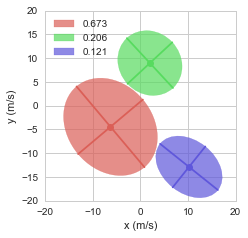

In [57]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Goodness-of-fit statistics

In [58]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.015      0.056  2.085569e-09      0.036       0.152

In [59]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQLWldJvzkdtbal1t1a7u13KaxG1r60gpGD1sTLW1D
MCIM0qhj+DUfKCMqYijBjLbyKYsyaMiAzEzbgUIQbCrDMkEoizY0MWzSOjbrrXvr1nLq1DlVZ8+z
5PZ+f2S9WW/mycyTZ8m6darziejoulX55pvnnMzn/NbnxxFCCCJEiBDhnIK/2RcQIUKECGEiIrkI
ESKca0QkFyFChHONiOQiRIhwrhGRXIQIEc41IpKLECHCuUZEchEiRDjXiEguQoQI5xoRyUWIEOFc
IyK5CBEinGtEJBchQoRzjYjkIkSIcK4RkVyECBHONSKSixAhwrlGRHIRIkQ414hILkKECOcaEclF
iBDhXCMiuQgRIpxrRCQXIUKEc42I5CJEiHCuEZFchAgRzjUikosQIcK5RkRyESJEONeISC5ChAjn
GhHJRYgQ4VxDvNkXEOHmgxACRVGgaRoEQYAkSeB5HhzH3exLixChb3CEEHKzLyLCzUOr1UK5XMbo
6ChUVQUAZDIZTE5OYnR0FDzPR6QXYagRWXJPYui6jkajgXw+j3Q6DU3TIEkSCCEghEDXdWiaBkVR
wHEcBEGISC/C0CEiuSchCCHQNA26roPjOOi6js3NTei6DlEUYRgG6vU64vE4RPHkFqGk12q1wPM8
BEGAIAgQRTEivQhnFpG7+iSDYRhQVRX0Y9/f30ehUMDKygpisRgURUE2mwXHcVBVFaIoIpVKIZlM
IpVKQRAE2/noeTiOs8hOFMW24yJEuFmILLknCaj7qes6AEDTNOzu7sIwDEiShNHRUSiKgkQiAUmS
MD4+jnQ6jVarhXq9jnK5jIODA4v0KPGxZKZpGgghaLVaEelFODOISO5JAMMwoGkaDMMAx3GoVqvY
29vD1NQUxsbGsL29bTue4zgQQsBxHBKJBBKJBKampkAIQbPZRKPRQKlUQjabhSRJFuH5kR7Pm9VK
qqpibGwsIr0Ip4aI5M45aByNJhOy2SwqlQqWl5ctSy1oxILjOIvMWNKr1+solUrY399HLBazubeU
3AghaDQayOVyVgKD/j+y9CKEiYjkzimc7qmiKNjZ2UEsFsPGxoaVUOgnWcCSHmBajNTSKxaL2N/f
RzwetwiPrqGWotPSi0gvQhiISO4cwumeFotFZLNZXLhwAVNTU23E5rTkKAl1C57nrXjd9PS0RXr1
eh2FQgHNZhMAcHh4aJEja+lFpBchDEQkd87AuqeGYWB/fx+NRgNra2tIJBJtx4dZ9sGSHgDIsoxc
LgcAODo6QqvVQiKRsCy9RCIRkV6EgSMiuXMCQggODg6QSqUQj8fRbDaxs7ODdDqNjY0Nizy81gLh
Eh5gkh7P85iZmQFgWpyNRgP1eh2Hh4cW6dGYXlDSi8ViUY1eBE9EJHcOQGvfisUiRFFEtVpFPp/H
wsICxsfHfde6kUOv7monOPfieR7pdBrpdBrASQcG7cJQFMVya6mlR8/hJD1FUaDrOiYnJyFJUkR6
ESxEJDfkoJ0LFNQd3NjYQCwWC3SOs1IPLggCRkZGMDIyAuCE9Or1OnK5HFRVbbP0KJnRhEcymUSz
2bR1ZESk9+RGRHJDCmdrVq1WQ6PRwOjoKJaXlwM/1F7HnQXi8yO9g4MDaJpmkR4leqelp6pqRHpP
ckQkN4RgkwsAcHBwgGKxiEQigYmJib4f4LNKAE7S0zTNIr1arWaVzFBLLx6PR6QXISK5YYKz9k1V
Vezu7oLjOGxsbCCTyXR9zrDib6cBURQxOjqK0dFRxONxNBoNjIyMWMXJuq5b8bxUKmVLULCkRxMZ
lPgi0jtfiEhuSOCsfatUKtjb28PMzAxmZmZsRbaDwDASH8/zFukBpqVXr9etNjTWynOSnmEYVgKH
JT1RFCGKYkR6Q4yI5IYAuq5bgpaEEOzv76NareLSpUtWDRrQm1XG9qmyvxs2uL1uURQxNjaGsbEx
AKblS93bUqkEwzBslh5rwbGkp6oqqtUq5ubmItIbQkQkd4bhTC7Q2rdEIoHLly9HBbEOdCIeSZIg
SZKN9KilVygUQAixWXqU9KhFSN1bjuMiS2+IEJHcGQXrngJAoVDAwcEB5ubmMDk5ObD6NjZG1c95
hhFUUmp8fByEEJulVygUAADJZNISEmUtXtbSi0jvbCMiuTOIYrEIQRAQj8dhGAYymQyazaZnaxbF
k4WcwgDHcYjFYojFYjbSq9frqFaraLVauH79uqulB0Skd5YRkdwZAnVPDw8PMTY2Bl3XsbOzg9HR
0Y6tWf3gPJDjoK+fJT1JklAoFDA3N4d6vQ5ZlnF4eAie5y3CSyaTnqQHwDYfQxCEiPROERHJnRGw
tW80eyrLcqDWLIpBkdWwkl5YxEEIsXpkY7EYJiYmrDGOtEaP6uSxiQzWgotI7+YhIrmbDGftm67r
kGUZPM931ZoF9E5Ow0pqNxMcxyEejyMej2NyctJGetVq1SI9Virei/Ty+TwmJiaQTqcthZWI9AaH
iORuIrxkyUVRxMTERFcEFyE8OEts3OBGeq1WC41GA5VKxZqPwbq3lPSazaaVuVUUBQDa5mNEpNc7
IpK7SXC2ZmWzWZRKJSwtLaFSqfR0U/djkR0eHqJSqSCRSFijCSOY6NU6pvMxWNJzGwrEZtHp506t
e+fM24j0ukd0J58ynLVvqqpiZ2cHoiji8uXLllTSabmd9AGrVqu4cOGCrRe00WjY3K1BJD7CcouD
WFv9YBD9wF5DgXRdt+ZjsJYeS2YR6fWOiOROEU73tFwuI5PJYHZ2FtPT09aN2o9F1s26er2OnZ0d
cByHlZUVa2YDVRWmfaBUujwej1ukxwpaBsWwPohhECg7H6NSqWB+fh6EEM+hQBHp9Y6I5E4JrO4b
IQSZTAayLGN1ddUaBEMRdgKBEIKjoyPk83ksLi4ik8m4tnXRh4vOa6BWHitoSUmPVfyI0B3Y7G3Q
oUDUso5IrzMikgsZXq1ZyWQSGxsbrq1Z/ZAcje14QdM07O3tQdM0K3ubyWQ6WiteKr71eh3ZbBaa
pnkqfpwGwswOh+0Ku50/yFAgalmzQ4FY0tM0DYqiIJPJYHFxEZIkPSlJLyK5EME21gPm8JZcLof5
+XlMTk56rgtCVl7r/B526p6OjY1heXnZcjd7ueHdtN3q9Trq9TqKxaLVB8o2v4eNYX1wg5CocygQ
S3qdhgLRuB8tc2EtPUmSbOR4HhGRXAigtW9PPPEELl++DADIZDJQFAXr6+uIx+O+6wddt+Z0T2mD
uvOYfmKCrOIH2xJFh9TwPI94PG5ZGMOUvb0ZllwnuJGe21CgZDLZlrkF7JbeeSe94bnThgTOxnpZ
lpHNZjE2NoalpaVAwfpBxuR0Xcfu7q7NPXVbN0iwLVFsdwDt4tja2rLKJ9hMYoTe4QwnsKQHANeu
XbOk4p1DgQB30hMEwarXG2bSi0hugHDWvtHmei/ryQ+DIDnqntK5D0HGEvazv991xeNxjI2NQZZl
XLp0yXK1aCax38xtmDiLllwnUNJLJpMolUpYX1+3JqHlcjnfSWjAyb3slIofRtKLSG4AoO6ppmmW
/tju7i4IIVhZWbHiVkHRr7tKCEGhUEAul+tpLGHYNzBbPgHY40vO+atuD6AbaIZyGBEmidJzdzMU
iJ2E5kxktFotcBzX1pFxlhGRXJ/was2ampqCpmk93QC93vA0YbGzsxM4/ncW4IwvuT2ANztzGyYJ
AeGKC7id2430qIAo+57T991ZIsTOvC0UCpiYmEAymbTI8iwRX0RyfcBZ+5bNZlGpVLC8vIx0On2q
nQsAoCgKqtU

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtUU2fW/7+5EKQhaukIeAMFwYKXykVpp4pTp9TWZWsd
RiRaZ3WG1g4dnVJ9KYxVcWZR0Dr2nXcUdGZc01Y7WtT+3rX07Zpe1I5UnbESmlZBUFHjXVBLTYIS
SM7vj/TEJJxrcnLl+ayVJck5z8kTJN+z9372s7eMoigKBAKBICHyQE+AQCCEH0RYCASC5BBhIRAI
kkOEhUAgSA4RFgKBIDlEWAgEguQoAz0BT9DpdIGeAoHgICsrS/C5X+sPwGYdzHpcpVJhwoQJUkwr
oISksADArsp6n13baDJCE63x2fWDBfI5vadgZa6o823WwYhLqGY9fuPi77ydUlBAXCECgSA5RFgI
BILkEGEhEAiSQ4SFQCBIDhEWAoEgOURYCASC5BBhIRAIkhOyeSwEQn/DZrNhzZo1aG1thUqlQmVl
JRITEx3HDx48iJqaGiiVSuTn56OgoIB3TFVVFUaPHg2tVgsAeO+99/Dxxx8DAKZPn44lS5aAoijk
5uZi1KhRAIBJkyZh+fLlnHMlwkIghAj79++HxWJBXV0d9Ho91q5di82bNwMAenp6UF1djT179iAq
KgparRYzZsxAY2Mj45jbt2/jjTfewIULF1BUVAQAuHTpEvbu3Yvdu3dDLpdDq9XiySefRFRUFMaN
G4ctW7YInitxhQiEEEGn02HatGkA7FbDyZMnHcfa2tqQkJCAQYMGQaVSISsrC8ePH2cdYzabsXTp
UsyZM8dxjfj4eGzduhUKhQIymQy9vb2IjIxEU1MTbty4gUWLFuHll1/GuXPneOdKhIVACBFMJhOi
o6MdzxUKBXp7ex3HNJr72xbUajVMJhPrmJEjR+KRRx5xuX5ERARiYmJAURTWrVuH9PR0jB49GkOG
DMHixYuxfft2vPLKKygtLeWdK3GFCIQQITo6Gmaz2fHcZrNBqVQyHjObzdBoNJxjmOju7saKFSug
VqtRUVEBABg/fjwUCgUAIDs7G+3t7aAoCjKZjPU6xGIhEEKEzMxM1NfbN9/q9XqkpqY6jiUnJ8Ng
MKCzsxMWiwUNDQ3IyMjgHOMORVF49dVXMXbsWPzhD39wiMmmTZvw/vvvAwBaWlowdOhQTlEBiMVC
IIQMeXl5OHLkCAoLC0FRFKqqqrBv3z50dXVh/vz5KC8vR1FRESiKQn5+PuLi4hjHsLF//3589dVX
sFgs+PLLLwEAy5Ytw+LFi1FaWopDhw5BoVCgupp9dzaNLBTbf+h0OlI2QQLI5/SegpW5ouqx6HQ6
3rIJYq4XrBCLhUDwMx33zgZ6Cj6HCAtBFKdv3+U9JzUmyg8zCV3OUT9lPTbKf9PwKURYCH3gE4/k
CSO5x5+45PiZiEz/xK/C0tPTgxUrVuDKlSuwWCwoLi7GmDFjUF5eDplMhpSUFFRUVEAuJ4tVvoQW
DqtVBoWFWUT4xIMLemzbiUs4ffsuEZd+iF+FZe/evRg8eDDWr1+Pzs5OPP/883j44YdRUlKCnJwc
rF69GgcOHEBeXp4/pxVWCHFVAPuX32g0uiRVSU3yhJFEXPopfhWWp59+GjNnzgRgXzNXKBRoamrC
lClTAAC5ubk4cuQIERYOvHVT/A0Rl/6JX4VFrVYDsKcf//a3v0VJSQnWrVvnSLZRq9UwGo2CrmU0
CTvPU3x9fTFcvuuajDQ0+SHWc4X+/jw93xNiRw3GtbZbAf2dBtP/Z3/A78Hba9eu4Te/+Q0WLFiA
Z599FuvXr3ccM5vNGDhwoKDr+DL/IhjyO5wtk9RJvrFCfO0KOdOu6MQ1S2CCucHw/9nf8GuU9ObN
m/jVr36F0tJS/PznPwcApKen49ixYwCA+vp6ZGdn+3NKQQktKskTRgada+Mp9OcQGgMihDZ+tVi2
bNmCO3fuoLa2FrW1tQCAN998E5WVlXjnnXeQlJTkiMH0R5wFJRyh4y2E8MevwrJy5UqsXLmyz+sf
fPCBP6cRdDjfxcNVVAj9C5IgF2ACaaWctXZDaez1+joTNA+KOp+sEIU/RFgChD+slBPG7ziPDxs+
UJLg7Ykz1wEIExjiDvUPiLAEAF9ZKUxCkpwSz3q+VEvNySnxaDtzHSeM34m2XgjhCREWPyOlqIgV
El9CxIXgDBEWPyKFqLiLSaCEhAkiLgQaIix+wltRcRYUqcTkDGWGwnxP1JhH1EM4j9PiQujfEGHx
A96IihSC8o25g/H1EbHRojJSTxvaXa7FJTLEaunfEGHxMZ6KireC4i4mqYmxfc4Ru3/G+Rq0yDCJ
C7FauDlnusx6bJT/puFTiLD4EG9FRaygCBETqUhNjOUUFwI7ndYfB3oKPodUVPIR/hSVb8wdDlFJ
TYx1PHwN/R5srhZXHg3ZMxTeEIvFB3giKmIFxfnL7ImI6HtuwKq0QtHTxXvupIg41mO05eIOlztE
kuTCHyIsEuNrUfFUUPQ9N/q8ljg4mjfz9tTVdpexbCJDXCLfY7PZsGbNGrS2tkKlUqGyshKJiYmO
4wcPHkRNTQ2USiXy8/NRUFDAO6aqqgqjR4+GVqsFAOzatQsffvghlEoliouL8cQTT+DevXsoLS3F
rVu3oFarsW7dOsTExHDOlQiLRHiaou+JqAgRFHchSRvGELwVkHnrPI4WGXdxYbNaCNKyf/9+WCwW
1NXVQa/XY+3atdi8eTMAez3p6upq7NmzB1FRUdBqtZgxYwYaGxsZx9y+fRtvvPEGLly4gKKiIgBA
R0cHtm/fjo8++gjd3d1YsGABHn/8cezcuROpqalYunQpPv74Y9TW1jJuJnaGCIsE+Dqe4qmgMImJ
N6QNi2UVF4Lv0el0mDZtGgBg0qRJOHnypONYW1sbEhISMGjQIABAVlYWjh8/Dr1ezzjGbDZj6dKl
jvarAPDtt98iIyMDKpUKKpUKCQkJaGlpgU6nw0svvQTAXj6WLnnCBREWD/FmE6EvrBRfCooztLgw
weQOceWzkF3O4jCZTIiOjnY8VygU6O3thVKphMlkcnFr1Wo1TCYT65iRI0di5MiRLsLCdQ36daHl
Y4mwiMTbXclSWyn+EhRn0obFQn/V1WphcodIAFdaoqOjYTabHc9tNhuUSiXjMbPZDI1GwzmG7/pM
1xBaPpYIiwDcl0a9TcuXQlQ8FZRW6qLj594BVigp7tIKY2UJgq/tCcRqEU5mZia++OILzJo1C3q9
HqmpqY5jycnJMBgM6OzsxAMPPICGhgYUFRVBJpOxjnFn4sSJ+NOf/oTu7m5YLBa0tbUhNTUVmZmZ
OHToECZOnIj6+npBvaWJsPAg9cZBKUVFiKA4CwlN+hD7OL5i2s0d7WilLrKKi7exFmK1iCMvLw9H
jhxBYWEhKIpCVVUV9u3bh66uLsyfPx/l5eUoKioCRVHIz89HXFwc4xg2hgwZgkWLFmHBggWgKAqv
v/46IiMjodVqUVZWBq1Wi4iICGzYsIF3rjKKoigpP7w/0Ol02FVZz3+ihxhNRlyz2DXX2/IGvrBS
xAoKLSTuCK3S39xhd3HcBebU1XYXYTltaO8TY2k7c51zzxAtLL60WnxZpb9gZa6gOziNTqfD/1Md
Zj3+M8tUUdcLVkjmLQN0Hx9vrZRAiEordRGt1EWkD4l1PLxF6DVSE2P7ZOEmp8RzZuCSGr/hCXGF
3JDS9REqKAC7qAiNpdAWihRCwvUe7laLFEvPyRNG4vSJSyTWEkYExGL55ptvsGjRIgCAwWCAVqvF
ggULUFFRAZvNFogpAbgvKlydBrnw1ErhE5W0YbGsouJuofgKpmtLvQpF9g+FD34Xlr/97W9YuXIl
uru7AQDV1dU

In [60]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: RuntimeWarning: divide by zero encountered in log


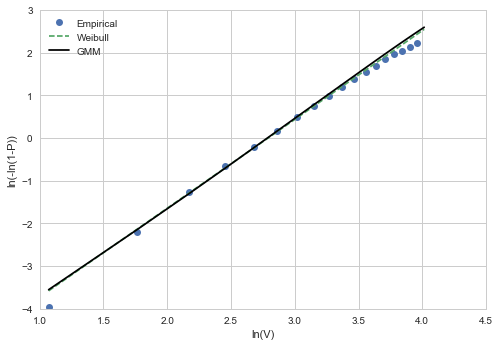

In [61]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Speed Distribution Comparison


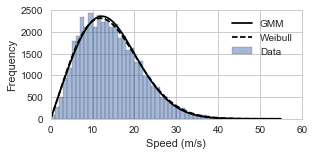

In [62]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])*len(df.speed)/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm,'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4.5, 2))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)

Direction Distribution Comparison


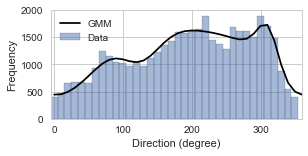

In [63]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4.5,2))
dir_fig = plt.gcf()
print(title)

In [64]:
# %%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.899284861866


## 6.3 Sectoral Comaprison

In [65]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. Make Plots
        fig = plt.figure(figsize=(10,1.9))
#         fig = plt.figure(figsize=(10,1.7))
        # 3.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
#         plt_configure(xlabel = "$V$", ylabel='Frequency', legend=True)
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 3.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
#         plt_configure(xlabel = "$V$", ylabel='$P$', legend=True)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3.3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt.gca().set_xlim(right = log(max_speed+1))
#         plt_configure(xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob, 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], x[diff_weibull.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:47: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:48: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:49: RuntimeWarning: divide by zero encountered in log


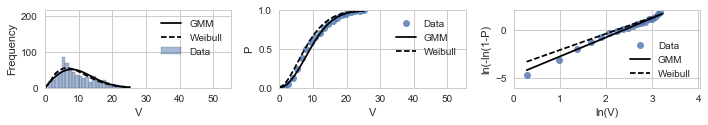

5.0 (-5.0 - 15.0) degree
data size: 665 weight 0.015523962929243412
GMM Weibull
R square 0.731316204283 0.816972406955
max diff: 0.0964883018073 0.0827137179126 speed value: 7.97522079462 3.98761039731 y gmm 0.408774856087
 


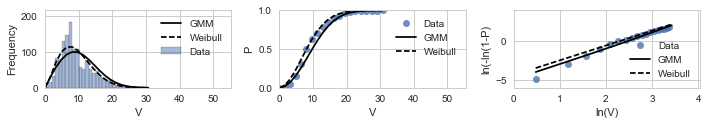

25.0 (15.0 - 35.0) degree
data size: 1348 weight 0.03146812335130845
GMM Weibull
R square 0.75316328487 0.856014729531
max diff: 0.135740965659 0.08326381032 speed value: 9.70022360191 4.85011180096 y gmm 0.494080992798
 


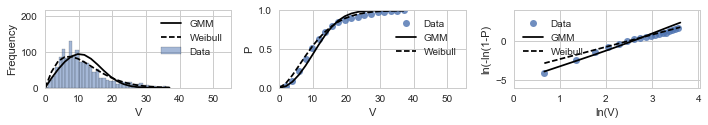

45.0 (35.0 - 55.0) degree
data size: 1339 weight 0.031258024604897634
GMM Weibull
R square 0.789153391889 0.894414818384
max diff: 0.0960251797299 0.0807750644612 speed value: 9.7419355025 3.896774201 y gmm 0.417791101077
 


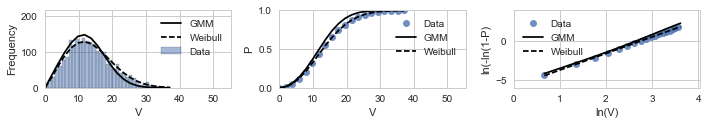

65.0 (55.0 - 75.0) degree
data size: 2180 weight 0.05089058524173028
GMM Weibull
R square 0.928604797448 0.973692330539
max diff: 0.0843259553833 0.0115965350259 speed value: 19.5358948775 13.6751264143 y gmm 0.896252560888
 


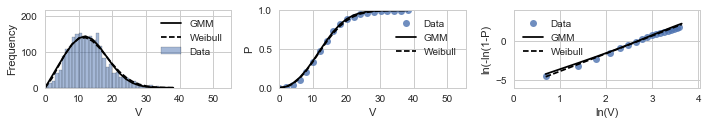

85.0 (75.0 - 95.0) degree
data size: 2183 weight 0.05096061815720055
GMM Weibull
R square 0.962085661909 0.961059687301
max diff: 0.0293075621133 0.0328751532488 speed value: 6.02159041107 16.0575744295 y gmm 0.131002477367
 


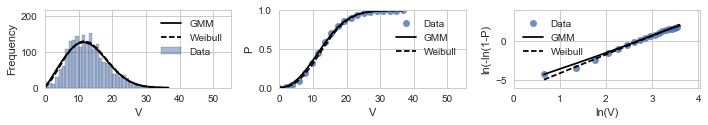

105.0 (95.0 - 115.0) degree
data size: 1983 weight 0.046291757125849146
GMM Weibull
R square 0.936226191041 0.94520609574
max diff: 0.0406810156213 0.0438182057903 speed value: 5.79482106447 13.5212491504 y gmm 0.125905423085
 


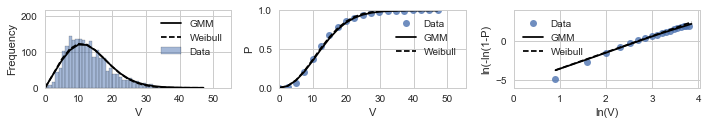

125.0 (115.0 - 135.0) degree
data size: 2007 weight 0.046852020449611315
GMM Weibull
R square 0.941719175203 0.947965813978
max diff: 0.0417420562409 0.0359999481751 speed value: 12.3971510944 4.95886043774 y gmm 0.497869303998
 


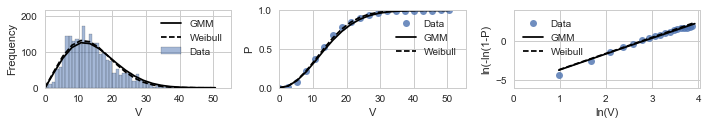

145.0 (135.0 - 155.0) degree
data size: 2353 weight 0.054929150033849246
GMM Weibull
R square 0.92227719704 0.937087604367
max diff: 0.0647140273552 0.0353103650534 speed value: 15.9851967167 15.9851967167 y gmm 0.617818909321
 


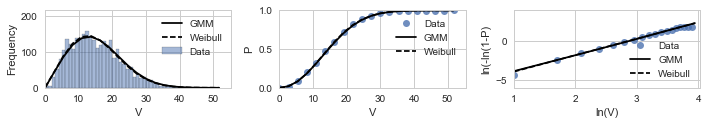

165.0 (155.0 - 175.0) degree
data size: 2785 weight 0.06501388986156827
GMM Weibull
R square 0.963262125175 0.966083673133
max diff: 0.0239061201971 0.0161901491056 speed value: 13.6146823393 13.6146823393 y gmm 0.450779696679
 


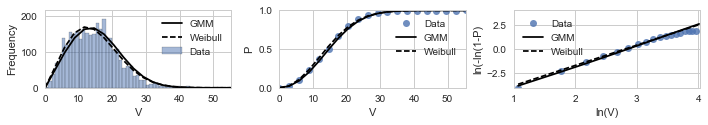

185.0 (175.0 - 195.0) degree
data size: 3167 weight 0.07393141443144945
GMM Weibull
R square 0.958309781017 0.962920716836
max diff: 0.0382100831083 0.0293296299155 speed value: 20.4107166027 14.5790832877 y gmm 0.764442269276
 


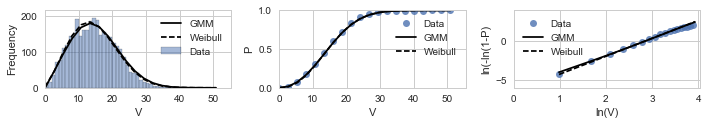

205.0 (195.0 - 215.0) degree
data size: 3267 weight 0.07626584494712516
GMM Weibull
R square 0.979023401745 0.979208548961
max diff: 0.0229706373722 0.0204586231449 speed value: 24.0877091413 24.0877091413 y gmm 0.892854278453
 


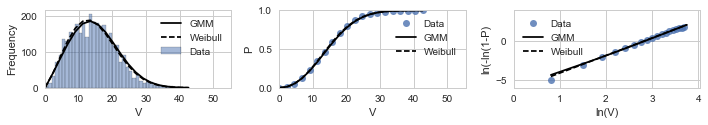

225.0 (215.0 - 235.0) degree
data size: 3333 weight 0.0778065690874711
GMM Weibull
R square 0.964345938343 0.96645068682
max diff: 0.0208273341472 0.0127286085972 speed value: 20.2149075158 8.98440334035 y gmm 0.783253073894
 


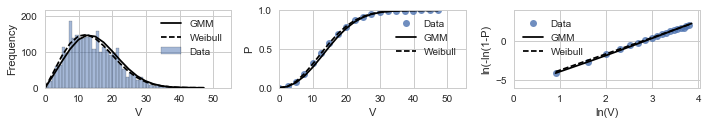

245.0 (235.0 - 255.0) degree
data size: 2665 weight 0.06221257324275743
GMM Weibull
R square 0.914939322442 0.940038002705
max diff: 0.0575309725459 0.0150282229142 speed value: 9.94318039932 9.94318039932 y gmm 0.265545950531
 


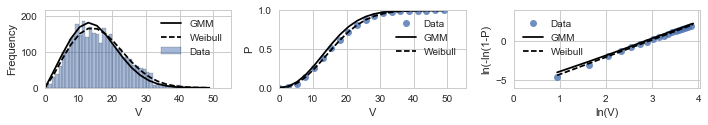

265.0 (255.0 - 275.0) degree
data size: 3307 weight 0.07719961715339543
GMM Weibull
R square 0.939327022109 0.964296199899
max diff: 0.0668593162395 0.0184522927005 speed value: 18.0029707029 10.2874118302 y gmm 0.685546948535
 


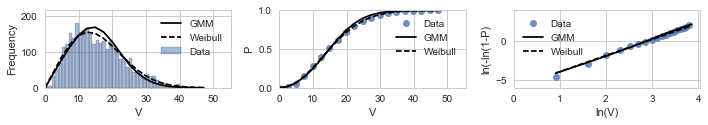

285.0 (275.0 - 295.0) degree
data size: 3132 weight 0.07311436375096295
GMM Weibull
R square 0.913884454528 0.955004159396
max diff: 0.0392299273165 0.0269708368684 speed value: 24.8443948592 12.4221974296 y gmm 0.899383184021
 


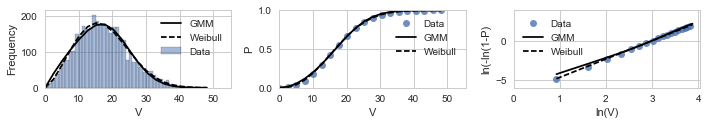

305.0 (295.0 - 315.0) degree
data size: 3596 weight 0.08394612134369821
GMM Weibull
R square 0.970407340271 0.979918902326
max diff: 0.0246769137437 0.0121000378996 speed value: 7.60080522404 10.1344069654 y gmm 0.118948326424
 


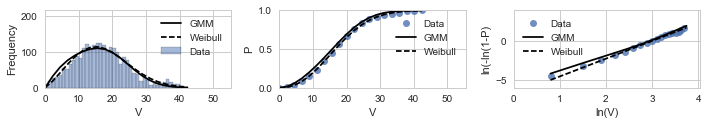

325.0 (315.0 - 335.0) degree
data size: 2358 weight 0.05504587155963303
GMM Weibull
R square 0.924366620067 0.948560800703
max diff: 0.0594844679425 0.0229035624461 speed value: 11.1420027831 22.2840055662 y gmm 0.291460719003
 


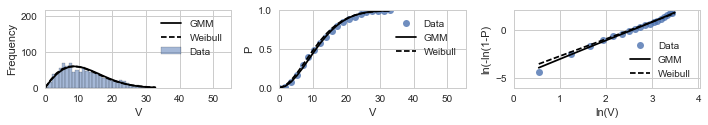

345.0 (335.0 - 355.0) degree
data size: 950 weight 0.02217708989891916
GMM Weibull
R square 0.904599349794 0.921718980398
max diff: 0.0365979192025 0.0342739851349 speed value: 8.63385158561 15.5409328541 y gmm 0.360244186061
 
Wall time: 1min 7s


In [66]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9307192617487888 0.9521571578584159


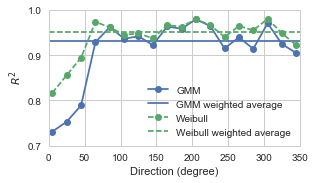

In [67]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.85)
plt.gca().set_ylim(top=1, bottom=ylim)
print(gmm_mean, weibull_mean)

0.04771139153745925 0.02763011286211806


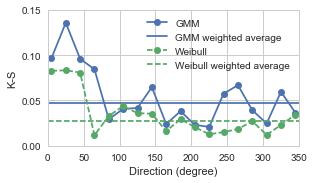

In [68]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.15)
plt.gca().set_ylim(top=ylim, bottom=0)
print(gmm_mean, weibull_mean)

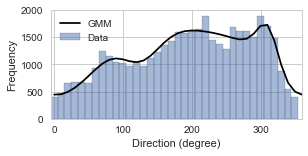

In [69]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [70]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [71]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: RuntimeWarning: divide by zero encountered in log


25.0 (15.0 - 35.0) Degree Speed Distribution
0.116055910821 10.0 0.515991566924


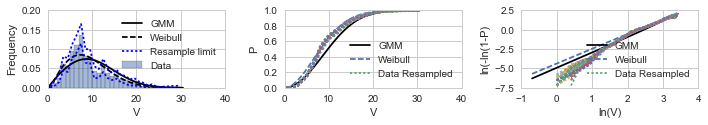

In [72]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### 6.4.2 Time Variability

In [73]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
# plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
# plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)", legend={'loc':'best'})
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log


25.0 (15.0 - 35.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXt4G9Wd//+eGd1s+W7LdhzbuTgJKZcQCJTSkGwXypam
pXRLSQKUpSnQlh/dlrJbltKWsjRc0+7Cl4X0wgOUlqVclm7JtgQ2EKCbss9C2gDhkoRcMbF1tXXX
3H9/OGcyGo2kkTSypei8noeHWLJGxxrNec/ncz6f92FUVVVBoVAoFAqlIOxMD4BCoVAolHqACiaF
QqFQKBaggkmhUCgUigWoYFIoFAqFYgEqmBQKhUKhWIAKJoVCoVAoFqCCSaFQKBSKBahgUigUCoVi
ASqYFAqFQqFYgAomhUKhUCgWoIJJoVAoFIoFqGBSKBQKhWIBKpgUCoVCoViACiaFQqFQKBaggkmh
UCgUigWoYFIoFApl2vjggw/wzW9+E6tXr8bf/d3f4atf/Sr27NmDe++9Fx/5yEfg9/u13w2Hwzjh
hBPw9NNPY3R0FMcddxx+/vOfZx3v61//Oi677LJpGTsVTAqFQqFMC+l0GldffTXWrVuHJ554Ao88
8gi+8Y1v4JZbbgEAzJ07F88++6z2+3/4wx8wa9Ys7efh4WE899xz2s8TExM4ePDgtI3fMW3vRKFQ
KJSa4Tvf+Q6efPJJW4950UUXYcOGDXmf37p1Kz72sY/hlFNO0R5bsmQJHnnkEfzbv/0bVq1ahc2b
N+PLX/6y9vt//dd/rf1uZ2cnOjo6sHfvXoyMjODZZ5/Feeedh9dff93WvyMfNMKkUCgUyrQwOjqK
4eFh7eerr74al112Gc477zyMj4+jp6cHTU1N+OCDD3Dw4EH09/fD7XZnHeMzn/kMfv/73wMAXnjh
BXzyk5+ctvHTCJNCoVAakA0bNhSMBqtBf38/du7cqf28ceNGAMDq1ashyzKAo4IoSRLOP/98bNu2
LesYn/zkJ3HppZfiC1/4Anw+Hzwez7SNn0aYFAqFQpkWzjnnHLz66qvYsWOH9tjBgwcxPj4OhmEA
AJ/61Kfwwgsv4PXXX8cZZ5yRcwyv14t58+Zhw4YN+OxnPzttYweoYFIoFAplmvB6vdi4cSN++ctf
4ktf+hLWrl2LG2+8Ed/97ncxMDAAAGhtbUV/fz+OP/54sKy5RJ1//vnYvn07zjzzzOkcPhhVVdVp
fUcKhUKhUOoQGmFSKBQKhWIBKpgUCoVCoViAVslSGhJFUSBJEgRBAMdxYFkWHMeB4zit+IBCoVD0
UMGkNBSKosDv96Ozs1P7WVVVqKqKZDKJeDyOgYEBsCwLhmGokFIoFA0qmJSGQFEUyLIMRVEwNjaG
jo4OKIoCURThdDo1MSQCSnrCSE0cwzCagFIhpVAaEyqYlGMaknrVF4OrqopgMIhIJAKGYSDLMlwu
F1iWhSRJSCaTcLlccDgcWWJoVUgdDof2M4VCOXagRT+UYxJZliEIAgRB0MRNkiRtJwRBEDBv3jzM
mzcP8+fPR29vL9xuN1RVxcTEBA4dOoS9e/fi0KFDGB8fx8TEBJLJpCa+RCiBo0IqSRJ4ntdSu4lE
AqlUCul0GjzPQ5Zl0C4uSiNz+eWX48033wQwdQ0uW7YMDzzwgPb8ZZddhnfffTfnda+88goef/xx
jI6OYvXq1Zbfb/ny5dpx9+7dW+HoaYRJOcaQZVlLvRJRkyQJoVAIExMTaGtrA8uymDVrFjiO04p+
mpqaoKoqeJ7H4OCgdiye5yEIAnieRyKR0ATY7XbD5XLB5XJp/y4WkfI8DwBgWVaLQElal0aklEZg
+fLleP3117FkyRJs374dZ511Fl5++WVceeWV4HkeH374IRYvXpzzupUrVwKY8qKdSahgUo4JzIRS
FEWEQiFMTk6ivb0dIyMjcLlciMfjWSnVfHAch+bmZjQ3N2c9TqpriZgmEgnwPA+GYbIElPzbuM6p
F1JRFLWIlayL6v9NhZRSTebOzX3s4ouB228v7/kDBwq/38c//nHcf//9+MpXvoKXX34ZF110EX78
4x8jHo/j7bffxkc/+lG89tpr+Nd//VdwHIehoSHccsst2LRpE/bt24e1a9ciEong61//OsLhMD7x
iU/gmmuuwQ033IBVq1Zh5cqVeOWVV/CHP/wBd9xxR2kfhgWoYFLqGjOhFAQBoVAI0WgUHR0dWLBg
AZxOZ9FjMQxjKWXqcDjgcDiyhJSIIBHRTCaDWCwGQRDAMIwmonoxJeKoT+1KkqT9mwipXjhlWTYV
YQqlHjj++OOxb98+qKqK1157Dddddx3OPPNM/OlPf8KuXbtw1lln4Qc/+AH+/d//Hd3d3bj77rvx
29/+Fg7HUalKpVLYsGEDmpubcemll+Kcc86ZtvFTwaTUHaqqZlW96oUyGAwiFouhs7MTCxcuzLrQ
CFaFsRQYhtGE1Ov1Zo2VrG0KgoB0Oo3JyUktFawXUfJ/Io76yl1FUQAA77//PubOnasVFhmLjfSv
o1CKUSwirPR5IyzLYvHixXjllVfg8/ngcrmwcuVKvPTSS3jvvfdw6aWX4gc/+AGuvfZaAEAmk8HH
P/5xzJkzRzvG4sWL0draCgA46aSTsH///qz3qGadABVMSt2QTyh5nkcwGEQ8HkdXV1deoSTkE8xq
CanT6cyJcFVVhSiKWmFSKpXShNThcOSsjxIhJccEsoVUn2LOt0ZKodQCy5cvx89+9jN85jOfAQAs
W7YM999/P4CpDaL7+/tx//33o7W1FS+88AKam5sxNjamvX7v3r1IJpNwu9148803sWbNGrz66qsI
BoMAgHfeeadqY6eCSal5iFBGIhFMTk5ieHhYE8pAIIBEImFJKI3MZCRG1jtdLlfW40RI9eujgiBA
FEU4HA7tc/B4PNrrjVGlXkgFQdDezyikxiIlCmU6+PjHP47vf//7uOuuuwAALpcLra2t+MhHPgKW
ZfG9730PX/3qV6GqKrxeL+66664swWxvb8e3v/1tRCIRrFq1CgsWLMBFF12EG2+8EZs2bcJcs4VX
m6C7lVBqFrIuSNoxEokEwuEw+vv7EQwGkUgk0N3dje7ubnAcZ/m4e/bswdDQEDwejyYoAMDzPMbG
xqp6wZWLqqoQBAGHDh1CR0eHJqqSJMHpdOakdvVmDPmOB+QKqcPhoOujFEoeaIRJqTmMQqlfo0yn
0zhw4AC6u7sxMDBQklASqpF6rTakcIhhGHR1dWl/N3ErIhEpKTQiQmpcHyVCWkpESl2NKJQpqGBS
aoZ8QplKpRAMBpFKpcCyLBYuXFjxmtx0rWFWG5Zl4Xa74Xa7sx5XFCWr9YWsjxJXI2Pri1nBEBFS
/WdC0rnUHpDSiFDBpMw4hYQyEAggk8nA5/Ohu7sbfr+/YrFshMmdZVl4PB54PJ6sx/UOSDzPI5VK
ged5KIpi2vpits5ptAck70fSuqIowuPxFE0LUyj1BhVMyoyRTyiTySQCgQAEQYDP58Pw8DBYlkU6
nbYlApzOKtlag7gaNTU1ZT1OhNRYbKSqqmnrSyEzhgMHDmBgYEBLIVPDesqxAhVMyrRjJpQAkEgk
EAgEIEkSfD4fOjo6siZWuwRNf5xGEEkr5BPSYq5GRjHlOC7rnNKdXyjHElQwKdOG3qQcOJoajcfj
CAQCkGUZvb29aG9vzztxVlPcqHjmUo6rkb71xUpEmi+1S3d+odQaVDApVUeWZUxMTKClpQXAUWGK
xWIIBoNQFAW9vb1oa2srODFWI8KklE4xV6ODBw/C4XAgk8kgGo1acjXSH4Ma1lNqFSqYlKpBXHlk
WcbBgwdxwgknAACi0ajmyuHz+YoKJaHagkmFtDKIqxHDMOjo6NBMJAq5GnEcZ1psVEhIjYb1xvYX
KqSUakEFk2I

### 6.4.3 Adjacent Sector Variability

In [74]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [75]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


25.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXuUHGWdPv5U9WWmp+d+vyeTZCCEMIKACeBmZcGNi3JQ
F7IaCQoEkeOKid9VAQVUUFeCgIcVVmHVNbiGsN5wBfwdUcAf8FUwbpBAIMlcyExm+jY9fa+u7q76
/jG+lbdrqrqrqqtqembqOScnMz1d9amqrn6f+tyeDyOKoggHDhw4cODAQUmwi30ADhw4cODAwVKA
Q5gOHDhw4MCBBjiE6cCBAwcOHGiAQ5gOHDhw4MCBBjiE6cCBAwcOHGiAQ5gOHDhw4MCBBjiE6cCB
AwcOHGiAQ5gOHDhw4MCBBjiE6cCBAwcOHGiAQ5gOHDhw4MCBBjiE6cCBAwcOHGiAQ5gOHDhw4MCB
BjiE6cCBAwcOHGiAQ5gOHDhw4MCBBjiE6cCBAwcOHGiAQ5gOHDhw4MA2HD9+HDfeeCO2bduGq666
Ch//+Mdx5MgR3H///TjttNMQCASk90YiEZx++un46U9/isnJSZx66qn47ne/W7S/T3ziE9ixY4ct
x+4QpgMHDhw4sAWZTAY33HADrr76auzfvx8//OEP8c///M/4yle+AgBYvXo1nnzySen9TzzxBHp6
eqTfBwcH8etf/1r6PRqNYmJiwrbjd9tmyYEDBw4cVA0++9nP4rHHHjN1n1dccQX27Nmj+vff/e53
2Lx5M8466yzptZGREfzwhz/Ev/3bv+GSSy7BU089hY997GPS+y+88ELpvS0tLWhubsaxY8ewdu1a
PPnkk3jPe96Dl19+2dTzUIPjYTpw4MCBA1swOTmJwcFB6fcbbrgBO3bswHve8x7MzMygvb0dPp8P
x48fx8TEBLq7u1FTU1O0j/e+97341a9+BQB4+umncfHFF9t2/I6H6cCBAwcrEHv27CnpDVqB7u5u
vPrqq9LvDz74IABg27ZtKBQKAE4SYj6fx6WXXornn3++aB8XX3wxPvKRj+CDH/wgOjo6UFtba9vx
Ox6mAwcOHDiwBRdddBFefPFF/O///q/02sTEBGZmZsAwDABg69atePrpp/Hyyy9j06ZNC/bh9/sx
NDSEPXv24H3ve59txw44hOnAgQMHDmyC3+/Hgw8+iP/8z//ElVdeiQ996EO45ZZbcPPNN6O3txcA
0NDQgO7ubmzYsAEsq0xRl156Kf70pz/hvPPOs/PwwYiiKNpq0YEDBw4cOFiCcDxMBw4cOHDgQAMc
wnTgwIEDBw40wKmSdbAiIQgC8vk8eJ6Hy+UCy7JwuVxwuVxS8YEDBw4c0HAI08GKgiAICAQCaGlp
kX4XRRGiKCKVSiGRSKC3txcsy4JhGIdIHThwIMEhTAcrAoIgoFAoQBAETE9Po7m5GYIgIJfLwePx
SGRICJT0hJGaOIZhJAJ1iNSBg5UJhzAdLGuQ0CtdDC6KIkKhEGZnZ8EwDAqFArxeL1iWRT6fRyqV
gtfrhdvtLiJDrUTqdrul3x04cLB84BT9OFiWKBQK4HkePM9L5JbP56VJCDzPY2hoCENDQ1izZg06
OztRU1MDURQRjUbx1ltv4dixY3jrrbcwMzODaDSKVColkS8hSuAkkebzeWSzWSm0m0wmkU6nkclk
kM1mUSgU4HRxOVjJ+OhHP4pXXnkFwPx38Oyzz8bDDz8s/X3Hjh14/fXXF2z33HPP4dFHH8Xk5CS2
bdum2d4FF1wg7ffYsWMVHr3jYTpYZigUClLolZBaPp9HOBxGNBpFY2MjWJZFT08PXC6XVPTj8/kg
iiKy2Sz6+/ulfWWzWfA8j2w2i2QyKRFwTU0NvF4vvF6v9HM5jzSbzSKfzyMajaKnpwcMw0hhXccj
dbAScMEFF+Dll1/GyMgI/vSnP+Gd73wnnn32WezcuRPZbBZTU1NYv379gu22bNkCYF6LdjHhEKaD
ZQEloszlcgiHw5ibm0NTUxPWrl0Lr9eLRCJRFFJVg8vlQl1dHerq6opeJ9W1hEyTySSy2SwYhiki
UPIzneckxUWESHO5nOSxkrwo/bNDpA6sxOrVC1/78IeBr3/d2N/Hx0vbO//88/HAAw/gmmuuwbPP
PosrrrgCd999NxKJBA4dOoR3vOMdeOmll3DvvffC5XJhYGAAX/nKV/DLX/4So6Oj+NCHPoTZ2Vl8
4hOfQCQSwbve9S588pOfxE033YRLLrkEW7ZswXPPPYcnnngC//qv/6rvYmiAQ5gOljSUiJLneYTD
YcRiMTQ3N2PdunXweDxl98UwjKaQqdvthtvtLiJS4k0SEuU4DvF4HDzPg2EYiURdLpdUgETIkSbT
fD4v/UyIlCZOh0gdLGVs2LABo6OjEEURL730Ej7zmc/gvPPOwwsvvIA33ngD73znO3Hrrbfiv/7r
v9DW1ob77rsPP/vZz+B2n6SqdDqNPXv2oK6uDh/5yEdw0UUX2Xb8DmE6WHIQRRGCICAcDiObzaKr
q0siylAohHg8jpaWFgwPDxd90Qi0EqMeMAwjEanf7y86VpLb5HkemUwGgiBgdHQULperyCMl/xMy
pCt3BUGQ9kfssSy7oNiI3s6Bg3Io5xFW+nc5WJbF+vXr8dxzz6GjowNerxdbtmzBM888g8OHD+Mj
H/kIbr31VuzatQsAwHEczj//fKxatUrax/r169HQ0AAAOOOMMzA2NlZkw8o6AYcwHSwZEKIkHiXx
LrPZLEKhEBKJBFpbW1WJkkCNMK0iUo/HI3m4PM9jamoKq1evRi6XkwqT0uk05ubmwPM83G73gvwo
TaQEpYg0lUrB5/OhtrZW8kgdOKgGXHDBBfjOd76D9773vQCAs88+Gw888ACA+QHR3d3deOCBB9DQ
0ICnn34adXV1mJ6elrY/duwYUqkUampq8Morr+Cf/umf8OKLLyIUCgEAXnvtNcuO3SFMB1UPQpTy
CtV8Po9kMolYLKaJKOVYDE+MkDLJd3q93qK/i6KIXC5XlB/leR65XA5ut3uBN+r1ehd4lYIgIBKJ
oKWlRdUjdblcC4qUHDiwA+effz6++MUv4q677gIAeL1eNDQ04LTTTgPLsvjCF76Aj3/84xBFEX6/
H3fddVcRYTY1NWH37t2YnZ3FJZdcgnXr1uGKK67ALbfcgl/+8pdYrZR4NQnOtBIHVQuSFyTtGGRx
5zhO8ii9Xi+Ghobgcrk07/fIkSMYGBhAbW0teJ6XXs9ms5ienrb0C5fL5XD8+HGsWbNG13aiKEre
KF25m8/n4fF4FoR2A4EAWltbi8LD8v0BC4nU7XY7YgwOHKjA8TAdVB2UiJJhGGQyGYRCIaTTabS1
tcHv9yOVSukiS8Ca0KvVIIVDNTU1Uv4GgKRWREiUFBrlcjkEAgH4fL4iMiWqRmqhXfIAQROpo2rk
wME8HMJ0UDVQI8p0Oo1QKIRMJoP29nb09/eDZVnEYjHDxGdXDtNqsCwrESmN48ePo76+HizLgud5
KT9KVI3krS9KBUOESOlrQsK55L0ktOwQqYOVAIcwHSw6BEFAOp2Gx+NZQJTBYBAcx6GjowMDAwNF
xStGCW6xF3e7SNnr9S4IydIKSNlsFul0GtlsFoIgKOZHlfKcpIe0UCjg2LFjGB4eXlCx63ikDpYj
HMJ0sGggHiXHcTh27BjWr18PhmGQSqUQDAbB8zw6OjowODioWOVZCWEulodpJ4Eo2SKqRj6fr+h1
QqTyYiNRFBVbX+RepiNY72AlwCFMB7ZDKfRaKBSQTCYRDAaRz+fR0dGB5ubmkgurGYS5FMOwVkCN
SEupGpGIwNzcnKKqEaBdsN4hUgdLAQ5hOrANtEg5cNIDSqVSEEURJ06cQGdnJ5qamjQtnGaTnUOe
C1FK1SiTyWB

# 7. Result Variability & Cross-Validation

In [76]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}
speed_unit_text=' (knot)'

## 7.1 Variability of the Result

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.670  -5.966   -5.186  10.115  10.203  -0.263
2  0.232   1.672    8.639   7.070   7.020  -0.063
3  0.098  10.723  -12.833   6.559   6.042  -0.301

GMM Plot Result
0.669565512998 [[-5.9659067 -5.1855938]] [  8.72077909  11.41787907] -135.948570306
0.232134119246 [[ 1.67168609  8.63874009]] [ 6.81605638  7.26614703] -131.827089015
0.0983003677559 [[ 10.7233506 -12.8325109]] [ 5.2350885   7.21883237] -127.357274396


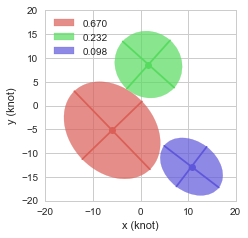

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.014      0.032  2.096995e-09      0.036       0.153

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.037  2.117822e-09      0.036       0.153

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.690  -5.866   -4.690  10.066  10.188  -0.242
2  0.210   2.006    8.948   6.890   6.816  -0.132
3  0.100  10.981  -13.519   6.884   6.193  -0.345

GMM Plot Result
0.690129151988 [[-5.86601279 -4.68995701]] [  8.8148216   11.28849143] -136.428274899
0.21017896851 [[ 2.00580112  8.94795007]] [ 6.38440872  7.29215281] -132.670429347
0.0996918795022 [[ 10.98117267 -13.51941068]] [ 5.24198143  7.63306065] -126.464019681


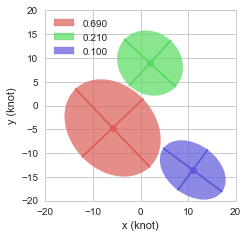

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.014      0.044  2.083158e-09      0.036       0.152

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.014      0.058  2.120076e-09      0.036       0.153

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.654  -4.369  -6.997  11.994  10.161  -0.355
2  0.288  -0.026   8.004   7.804   7.145   0.067
3  0.058   4.670  -9.268  10.468   5.180  -0.809

GMM Plot Result
0.653933796948 [[-4.3693603  -6.99725171]] [  8.70666231  13.08777408] -122.410379735
0.288217631592 [[-0.02560747  8.00413457]] [ 7.05601855  7.8843557 ] -71.361807666
0.0578485714604 [[ 4.66956169 -9.26849648]] [  2.80911613  11.33693368] -113.341256123


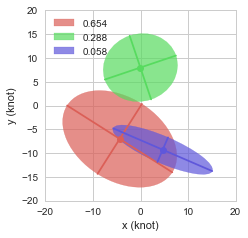

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.007      0.025  2.136753e-09      0.036       0.154

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.010      0.024  2.124773e-09      0.036       0.154

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.662  -6.589   -3.989  9.590  10.178  -0.146
2  0.193   2.133    9.252  6.679   6.715  -0.129
3  0.145   9.797  -13.040  7.114   7.031  -0.275

GMM Plot Result
0.661760117001 [[-6.58886886 -3.98906676]] [  9.07489808  10.63941747] -146.070007761
0.193095968949 [[ 2.13253285  9.25178682]] [ 6.24949876  7.11674379] -136.213598535
0.14514391405 [[  9.79744608 -13.03996432]] [ 6.01912594  7.98832679] -133.775621109


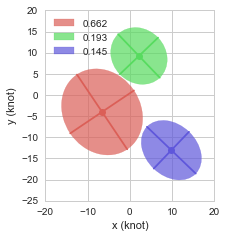

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.979  0.016      0.063  2.253302e-09      0.036       0.158

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.061  2.123594e-09      0.036       0.154

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.603  -7.448   -3.708  9.239  10.078  -0.143
2  0.202   2.073    8.915  6.637   6.900  -0.111
3  0.195   8.261  -12.245  7.872   7.486  -0.268

GMM Plot Result
0.603028555162 [[-7.448278   -3.70750948]] [  8.82689305  10.44112342] -150.712231846
0.201895732727 [[ 2.07252233  8.91467496]] [ 6.36047151  7.15651006] -144.659684035
0.195075712111 [[  8.26091275 -12.24489395]] [ 6.55260848  8.66466758] -129.682937279


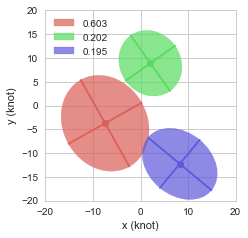

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.015      0.084  1.905279e-09      0.035       0.145

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.062  2.125084e-09      0.036       0.154

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.644  -4.072  -7.459  12.222  10.159  -0.348
2  0.299  -0.331   7.722   7.922   7.038   0.065
3  0.056   3.640  -8.924  10.163   5.104  -0.810

GMM Plot Result
0.644474050854 [[-4.07203388 -7.45949229]] [  8.78910026  13.24094295] -120.96144381
0.299351890122 [[-0.33063115  7.72195925]] [ 6.97083987  7.98088585] -75.5421821107
0.0561740590237 [[ 3.63999985 -8.92368501]] [  2.75529699  11.03417299] -113.710989851


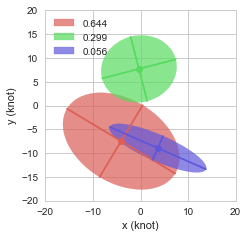

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.008      0.027  2.168575e-09      0.037       0.155

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.008      0.027  2.141086e-09      0.036       0.154

weight  mean_x  mean_y   sig_x  sig_y    corr
1  0.688  -2.550  -7.675  12.250  9.138  -0.349
2  0.278  -1.968   8.647   8.057  7.638   0.334
3  0.034   5.272   4.616   2.798  3.706  -0.323

GMM Plot Result
0.687690064836 [[-2.55013239 -7.67543776]] [  8.08924497  12.96679091] -114.795649021
0.278446619419 [[-1.96845105  8.64709643]] [ 6.39057185  9.07793995] -49.5480968189
0.0338633157452 [[ 5.27174526  4.61589968]] [ 2.51316341  3.90465848] -155.705108913


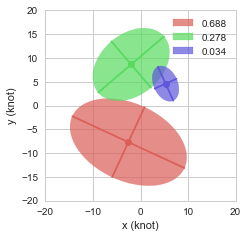

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.984  0.007      0.026  1.731795e-09      0.032       0.139

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.010      0.027  1.821820e-09      0.033       0.142

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.682  -6.535   -3.762  9.441  10.272  -0.157
2  0.178   2.601    9.102  6.544   6.698  -0.162
3  0.140   9.952  -13.196  7.060   6.614  -0.238

GMM Plot Result
0.681948116645 [[-6.53481352 -3.76154936]] [  8.94735867  10.70485979] -149.144392999
0.178368186413 [[ 2.60139477  9.10221885]] [ 6.05667782  7.14238663] -139.09449407
0.139683696942 [[  9.9518732  -13.19594844]] [ 5.93934689  7.63608835] -127.324705691


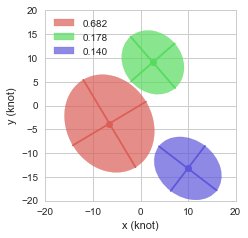

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.016      0.091  2.029708e-09      0.033       0.150

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.018      0.079  2.155161e-09      0.036       0.155

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.659  -6.436   -4.754  9.905  10.175  -0.262
2  0.225   1.894    8.726  6.867   6.898  -0.095
3  0.116  10.461  -12.481  6.939   6.447  -0.346

GMM Plot Result
0.658782809434 [[-6.43574453 -4.75444605]] [  8.6167313  11.2873542] -137.925721782
0.225261317168 [[ 1.89421512  8.72599178]] [ 6.54685999  7.20252398] -136.336271196
0.115955873398 [[ 10.46104217 -12.48092697]] [ 5.38950704  7.78864232] -128.986920879


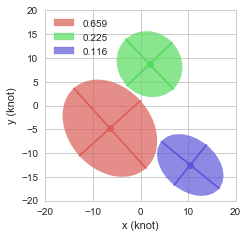

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.065  2.184193e-09      0.036       0.156

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.015      0.050  2.106723e-09      0.036       0.153

weight  mean_x   mean_y  sig_x  sig_y    corr
1  0.644  -6.551   -4.608  9.753  9.899  -0.226
2  0.224   1.547    9.000  6.949  6.865  -0.068
3  0.131  10.037  -12.629  6.887  6.766  -0.280

GMM Plot Result
0.644184096156 [[-6.55131461 -4.60813062]] [  8.64317497  10.88112014] -136.878124265
0.224351955643 [[ 1.54659089  8.99957415]] [ 6.66492324  7.14146048] -129.908424591
0.1314639482 [[ 10.03690151 -12.62857496]] [ 5.79080138  7.72473208] -133.190883013


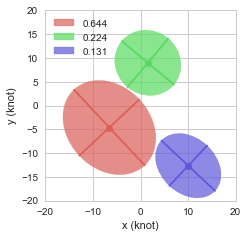

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.978  0.016      0.041  2.428009e-09      0.037       0.164

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.017      0.043  2.131264e-09      0.036       0.154


Wall time: 55.6 s


In [77]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [78]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32127.75 10709.25
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.074527  0.020843  7.983798e-09    0.070138     0.297856  0.926287
1    0.076199  0.021323  8.322850e-09    0.071981     0.303909  0.922560
2    0.077396  0.022251  8.569491e-09    0.071535     0.308530  0.921290
3    0.075476  0.020663  8.360673e-09    0.069780     0.304854  0.923071

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.083040  0.027312  9.195588e-09    0.071894     0.319437  0.915379
1    0.078704  0.024157  8.942834e-09    0.069741     0.315657  0.919641
2    0.077781  0.020844  7.870736e-09    0.068111     0.295699  0.926517
3    0.085486  0.032490  8.955330e-09    0.075564     0.315086  0.916955

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.031724  0.010516  2.806518e-09    0.041342     0.176682  0.974342
1    0.034795  0.010666  2.735433e-09    0.039882     0.174427  0.974720
2    0.032704  0.013393  2.800423e-09    0.041952     0.176162  0.973927
3    0.031573  0.010468  2.680018e-09    0.040241     0.172529  0.975266

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.045293  0.014838  3.090572e-09    0.042925     0.184927  0.970730
1    0.036609  0.015823  3.430250e-09    0.047394     0.194833  0.968609
2    0.035219  0.015928  3.205612e-09    0.041747     0.189391  0.971279
3    0.038924  0.010109  3.281148e-09    0.044345     0.190957  0.969763

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.042925  0.014604  2.153515e-09    0.036303     0.154586  0.980006
1    0.046299  0.015302  2.038618e-09    0.035335     0.150495  0.981171
2    0.026478  0.007645  1.947289e-09    0.034037     0.147129  0.981940
3    0.077054  0.016245  2.121098e-09    0.035671     0.153515  0.980635

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.052338  0.015572  2.624772e-09    0.039326     0.171025  0.976285
1    0.077432  0.019643  2.816259e-09    0.039652     0.176838  0.974130
2    0.027103  0.016565  2.426333e-09    0.038574     0.163996  0.978004
3    0.072482  0.021098  2.518641e-09    0.039385     0.167216  0.976019

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.016516  0.006873  1.061037e-09    0.025165     0.108627  0.990230
1    0.018900  0.007903  1.085522e-09    0.025767     0.109780  0.989965
2    0.017169  0.007356  1.055276e-09    0.025412     0.108233  0.990194
3    0.019380  0.007270  1.104183e-09    0.025744     0.110756  0.989868

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.023577  0.008931  1.830937e-09    0.033514     0.142369  0.983056
1    0.023906  0.012028  1.605349e-09    0.030744     0.133653  0.985302
2    0.029682  0.012121  1.771087e-09    0.032095     0.140407  0.984042
3    0.018783  0.012710  1.725287e-09    0.032414     0.138418  0.983861

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.163278  0.012684  1.085200e-09    0.025752     0.109768  0.989945
1    0.019484  0.007194  1.025801e-09    0.024827     0.106699  0.990615
2    0.013758  0.008441  7.230799e-10    0.020759     0.089633  0.993302
3    0.014272  0.008605  7.549898e-10    0.021350     0.091631  0.993020

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.088238  0.013057  1.716499e-09    0.031397     0.138184  0.984384
1    0.025045  0.013418  1.631427e-09    0.030175     0.134803  0.984609
2    0.026385  0.007592  1.315183e-09    0.028009     0.120827  0.988020
3    0.016040  0.011441  1.309359e-09    0.028278     0.120395  0.988020

Wall time: 2min 29s


In [79]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.075900  0.021270  8.309203e-09    0.070859     0.303788  0.923302
2    0.032699  0.011261  2.755598e-09    0.040854     0.174950  0.974564
3    0.048189  0.013449  2.065130e-09    0.035337     0.151431  0.980938
4    0.017991  0.007351  1.076504e-09    0.025522     0.109349  0.990064
5    0.052698  0.009231  8.972677e-10    0.023172     0.099433  0.991721

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.081253  0.026201  8.741122e-09    0.071327     0.311470  0.919623
2    0.039011  0.014175  3.251896e-09    0.044103     0.190027  0.970095
3    0.057339  0.018220  2.596501e-09    0.039234     0.169768  0.976110
4    0.023987  0.011447  1.733165e-09    0.032192     0.138712  0.984065
5    0.038927  0.011377  1.493117e-09    0.029465     0.128552  0.986258

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


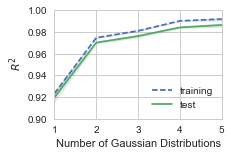

K_S


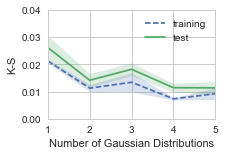

Chi_square


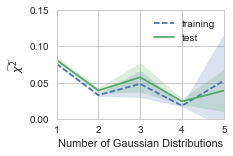

In [80]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

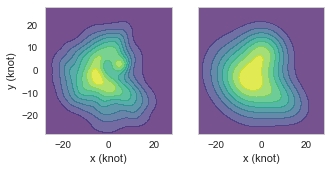

In [81]:
# fig = plt.figure(figsize=(4.3,2.4))
fig = plt.figure(figsize=(5,2.5))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

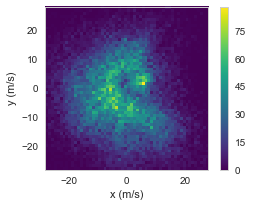

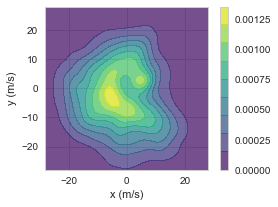

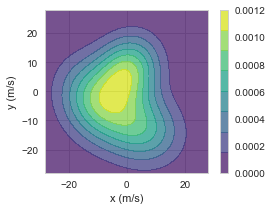

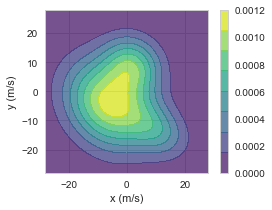

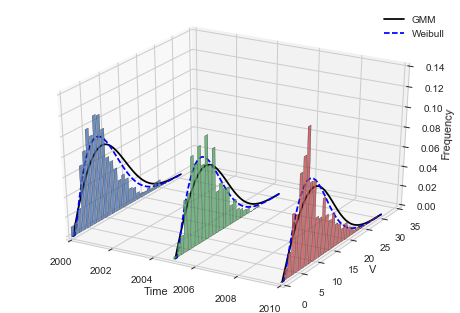

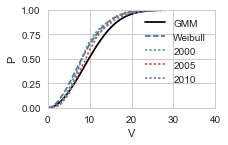

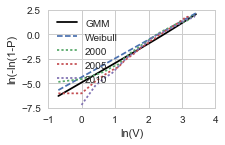

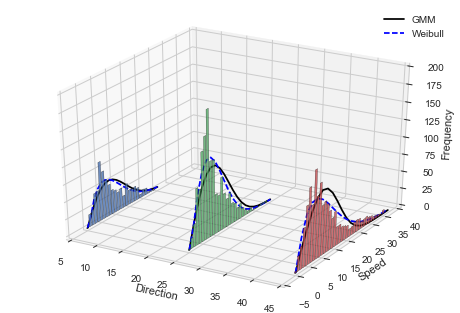

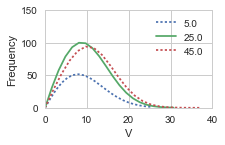

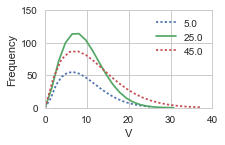

In [82]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [ ]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = 'D://output/'+location_name+'.html' 
output_HTML(current_file, output_file)